# Trabajo Final de Machine Learning - Etapa 1

## Introducción

Este trabajo constituye el proyecto final de la materia de Machine Learning. El objetivo principal es analizar una base de datos en la que las columnas no tienen un significado claro, lo que dificulta la interpretación inicial de los datos. Por esta razón, será necesario explorar las estadísticas descriptivas del conjunto de datos, ya que serán la principal guía para identificar las características más relevantes.

Además, se desarrollará un modelo de Machine Learning capaz de predecir si una transacción en un e-commerce es fraudulenta o no. Para ello, se utilizará un dataset que contiene 19 variables, etiquetadas de "A" a "S", una columna que indica el monto de la transacción, y la variable de respuesta denominada "fraude," que señala si la transacción es fraudulenta (1) o no (0). El modelo será ajustado y optimizado mediante la selección de parámetros para mejorar su precisión y rendimiento en la detección de transacciones fraudulentas.

no obstante para llevar a cabo este trabajo nos vamos a basar de un indice general el cual nos va a mostrar la ruta que deberemos de seguir.

## Indice: 

Etapa 1

1. Introducción 
2. Indice
3. Analisis estadistico.
    * Analisis general
    * Analisisi variables numericas
    * analisis variables categoricas

Etapa 2
1. Limpieza de datos
2. Entrenar modelo
3. Ajustar modelo 
4. Probar modelo
5. modelo iteractivo de predicciones 



Lo primero que haremos será realizar un análisis general de los datos. Para esto, descargaremos el dataset y analizaremos qué columnas tenemos, cuántas muestras existen y evaluaremos un aspecto importante: si los datos están muy desbalanceados. Este factor influirá considerablemente en la elección del modelo. Además, dividiremos los datos en dos tipos para analizarlos por separado: por un lado, los datos numéricos, y por otro, los datos de tipo "object," que en el fondo representan datos de tipo cadena (string).

## Analisis datos general

Ahora hablaremos de las librerías que utilizaremos en todo el proceso:

* **Pandas**: Es una biblioteca esencial para el manejo y análisis de datos estructurados en Python. Nos permite trabajar con estructuras de datos como DataFrames, lo que facilita la manipulación, limpieza y transformación de los datos de manera eficiente.

<img src="imagenes/biblioteca_pandas.jpg" width="200" style="display: block; margin: auto;">


* **Seaborn**: Es una biblioteca de visualización de datos basada en Matplotlib que permite crear gráficos estadísticos atractivos y fáciles de interpretar. Seaborn simplifica la creación de gráficos complejos, como distribuciones, gráficos de correlación y relaciones entre variables, y es ideal para el análisis exploratorio de datos (EDA).

<img src="imagenes\logo-wide-lightbg.png" width="200" style="display: block; margin: auto;">

* **Matplotlib**: Es una biblioteca de gráficos fundamental en Python. Permite crear visualizaciones de alta calidad, personalizables y detalladas, lo cual es útil para representar patrones y tendencias en los datos. Matplotlib se usa a menudo junto con Seaborn para una mayor flexibilidad en la personalización de gráficos.
<img src="imagenes\descarga.jpeg" width="200" style="display: block; margin: auto;">

* **Scipy**: Es una biblioteca que proporciona herramientas avanzadas para realizar operaciones matemáticas, científicas y de ingeniería. En este proyecto, se utilizará especialmente para cálculos de estadística, como la matriz de correlación de Pearson y la correlación de Spearman, que nos ayudan a entender la relación entre variables.
<img src="imagenes\SciPy.jpeg" width="200" style="display: block; margin: auto;">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
#%matplotlib inline

Entonces, lo que haremos en este caso es que, una vez descargadas las librerías y los módulos necesarios, procederemos a cargar los datos que vamos a utilizar. Estos datos se encuentran en un archivo CSV llamado "TechnicalInterviewFraudPrevention."

In [3]:
datos = pd.read_csv('Base_datos/TechnicalInterviewFraudPrevention.csv')

In [3]:
datos

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,3,0.00,0.00,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,UY,...,0,3,1,0,2,0.00,0.00,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,1,0.00,0.00,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,BR,...,1,1,1,0,1,0.00,0.00,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,BR,...,1,1,1,0,5,0.00,0.00,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,BR,...,0,1,1,0,1,0.00,0.00,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,BR,...,0,2,1,0,1,0.00,0.00,29.00,36.97,1


In [4]:
dimensiones=datos.shape
print(f"el archivo tiene {dimensiones[0]} filas y {dimensiones[1]} columnas")

el archivo tiene 16880 filas y 21 columnas


Como podemos observar, tenemos 21 columnas y 16,880 filas, por lo que podemos decir que esta es una base de datos relativamente mediana, ya que no cuenta con demasiadas muestras. Esto será importante porque, si notamos que los datos están desbalanceados, es decir, que hay más datos de una clase que de otra, nos veremos obligados a realizar una estratificación de los datos. En este caso, la mejor estratificación sería en función de la variable de respuesta, para mantener siempre una proporción adecuada entre los datos de transacciones fraudulentas y no fraudulentas.

In [5]:
datos.columns = datos.columns.str.lower().str.replace(' ','_')
strings = list(datos.dtypes[datos.dtypes == 'object'].index)
for col in strings:
    datos[col] = datos[col].str.lower().str.replace(' ','_')

In [6]:
datos["q"] = datos["q"].str.replace(",", "")
datos["r"] = datos["r"].str.replace(",", "")
datos["monto"] = datos["monto"].str.replace(",", "")

In [7]:
datos["q"] = datos["q"].astype(float)
datos["r"] = datos["r"].astype(float)
datos["monto"] = datos["monto"].astype(float)

In [8]:
datos

,a,b,c,d,e,f,g,h,i,j,...,l,m,n,o,p,q,r,s,monto,fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,uy,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,uy,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,uy,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,uy,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,uy,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,br,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,br,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,br,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,br,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


En las filas anteriores, podemos observar lo siguiente: las columnas `q`, `r` y `monto` contienen datos numéricos, pero están clasificadas como datos de tipo string, por lo que necesitamos cambiar su tipo de dato al adecuado. Sin embargo, surge un problema, ya que muchas de las muestras en estas columnas tienen números en un formato con comas, es decir, en un formato como `$1,200.25$`, donde la coma indica miles y el punto, decimales. Antes de convertir estas columnas al tipo de dato adecuado, primero eliminaremos la coma usando un reemplazo que la sustituya por un carácter vacío.


In [9]:
Cantidad_datos=len(datos)
caracteristicas_columnas = pd.DataFrame({
    "columnas": datos.columns,
    "tipos datos": datos.dtypes,
    "datos_nulos":datos.isnull().sum(),
    "porcentaje datos nulos":round((datos.isnull().sum()*100)/Cantidad_datos,1),
    "datos no nulos": datos.notnull().sum(),
    "porcentaje datos no nulos": round((datos.notnull().sum()*100)/Cantidad_datos,1),
    "Cantidad datos":len(datos)
})
caracteristicas_columnas

,columnas,tipos datos,datos_nulos,porcentaje datos nulos,datos no nulos,porcentaje datos no nulos,Cantidad datos
a,a,int64,0,0.0,16880,100.0,16880
b,b,int64,0,0.0,16880,100.0,16880
c,c,float64,3197,18.9,13683,81.1,16880
d,d,int64,0,0.0,16880,100.0,16880
e,e,int64,0,0.0,16880,100.0,16880
f,f,float64,0,0.0,16880,100.0,16880
g,g,float64,0,0.0,16880,100.0,16880
h,h,int64,0,0.0,16880,100.0,16880
i,i,int64,0,0.0,16880,100.0,16880
j,j,object,0,0.0,16880,100.0,16880


Ahora queremos identificar qué columnas de la base de datos tienen datos faltantes y cuántos valores faltan en cada una. Esto es importante porque nos permitirá decidir qué columnas con datos faltantes podemos conservar y cuáles no. En este caso, descartaremos directamente la columna `K`, ya que más del 75% de sus datos están vacíos, y llenar esos datos solo incrementaría el ruido en el modelo, algo que queremos evitar. Por otro lado, la columna `C` tiene 3,000 datos vacíos, lo cual es mucho menos que la mitad de sus valores, por lo que la conservaremos por ahora. Como `C` es de tipo flotante, lo más adecuado sería llenarla con valores de tendencia central. Alternativamente, podemos analizar su distribución y varianza para determinar otro método más adecuado para completar los datos faltantes.

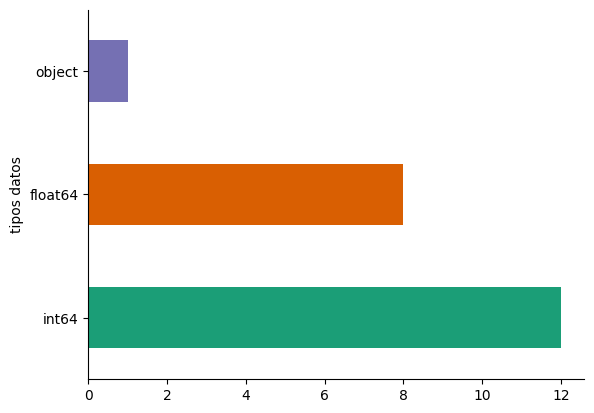

In [10]:
caracteristicas_columnas.groupby('tipos datos').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

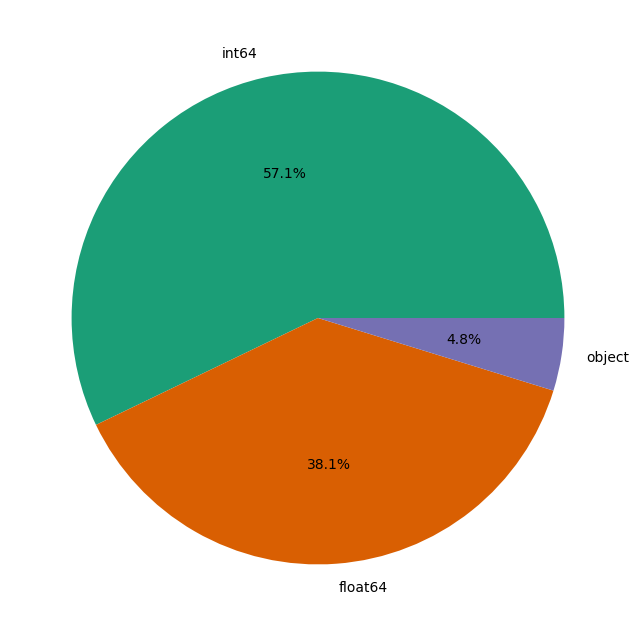

In [11]:
counts = caracteristicas_columnas.groupby('tipos datos').size()
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.gca().set_aspect('equal')

Como es común, veamos la tabla para identificar los tipos de datos y cómo se distribuyen.

In [12]:
data = []

for col in datos.columns:
    # Verifica si la columna es de tipo numérico
    if datos[col].dtype in ['int64', 'float64']:
        # Obtén solo los primeros 5 valores únicos
        unique_values = datos[col].unique()[:5]
    else:
        # Obtén todos los valores únicos si es de tipo object o str
        unique_values = datos[col].unique()

    # Almacena la información en un diccionario
    data.append({
        'Column': col,
        'Unique Values': unique_values,
        'Number of Unique Values':datos[col].nunique(),
        'Data Type': datos[col].dtype
    })

# Crea un DataFrame a partir de la lista de diccionarios
df_summary = pd.DataFrame(data)

# Muestra el DataFrame
df_summary

,Column,Unique Values,Number of Unique Values,Data Type
0,a,"[0, 9, 1, 10, 11]",21,int64
1,b,"[10, 7, 16, 8, 12]",21,int64
2,c,"[50257.0, 29014.0, 92.0, 50269.0, 8180.0]",9782,float64
3,d,"[0, 1, 12, 4, 3]",31,int64
4,e,"[0, 1, 2, 4, 3]",23,int64
5,f,"[0.0, 0.014, 0.007, 0.25, 0.19]",153,float64
6,g,"[0.0, 0.058, 0.005, 0.033, 0.104]",106,float64
7,h,"[0, 9, 1, 4, 3]",14,int64
8,i,"[0, 1, 3, 2, 4]",17,int64
9,j,"[uy, mx, us, es, ar, ca, gb, ua, cl, co, it, g...",19,object


Ahora vamos a analizar los valores únicos de la tabla para determinar qué podemos hacer con ellos. Observamos que las columnas `C`, `S` y `monto` tienen muchos valores únicos, lo cual nos puede indicar lo siguiente:

1. **Alta Variedad de Datos**: La columna probablemente representa una característica con mucha diversidad, como un identificador único (ID), nombres de productos o categorías muy específicas que pueden tener un valor único o cercano a único para cada fila.

2. **Posible Necesidad de Agrupación o Simplificación**: Como vemos que hay tantos datos unicos podríamos considerar agruparlos en categorías más amplias o generalizar algunos de los valores para reducir la cardinalidad (número de valores únicos) de la columna.

3. **Consideración para el Modelo**: Si planeamos utilizar esta columna en un modelo de Machine Learning, demasiados valores únicos pueden aumentar la complejidad del modelo sin necesariamente mejorar su rendimiento. En modelos como árboles de decisión, esto podría llevar a un sobreajuste, y en otros modelos puede incrementar innecesariamente el tiempo de cómputo.

4. **Posible Señal de Datos Atípicos o Anómalos**:para las columnas que son numéricos y presentan muchos valores únicos, puede ser útil analizar si existen valores atípicos que podrían estar afectando la interpretación.


<Axes: ylabel='count'>

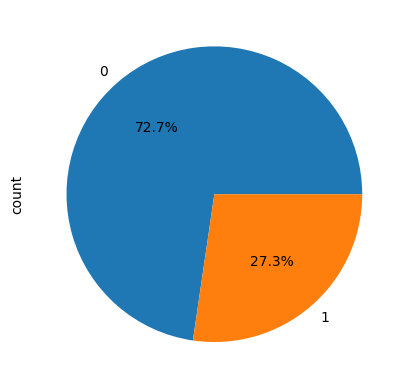

In [13]:
datos['fraude'].value_counts().plot.pie(autopct='%1.1f%%')

Ahora podemos observar algo crucial en la base de datos: está desbalanceada a favor de la clase 0, que indica que no hay fraude. Esto es normal, ya que en el contexto de transacciones, lo común es que la mayoría no sean fraudulentas.

* **Sesgo en el Modelo de Machine Learning**: En problemas de clasificación, los algoritmos tienden a favorecer la clase mayoritaria porque es más fácil lograr precisión al predecir la clase más común. Esto puede llevar a un sesgo en el modelo y a una baja capacidad para identificar correctamente la clase minoritaria.

* **Desempeño de Métricas Engañoso**: Métricas como la precisión (accuracy) pueden ser engañosas en un conjunto de datos desbalanceado. Por ejemplo, si una clase representa el 90% de los datos, un modelo que siempre predice esa clase tendrá un 90% de precisión, pero no será útil para predecir la clase minoritaria. En su lugar, métricas como el F1-score, recall (sensibilidad) y AUC-ROC (área bajo la curva ROC) pueden proporcionar una evaluación más precisa del desempeño del modelo.

* **Dificultad en Generalización**: Un modelo entrenado en una base de datos desbalanceada puede tener dificultades para generalizar en nuevas observaciones, especialmente si estas contienen más ejemplos de la clase minoritaria. Esto puede provocar un bajo rendimiento en situaciones reales o de producción.

## Datos numericos


Ahora bien lo que haremos es separar los dato con respecto a los datos numericos y empezar a sacar estadisticas muy importantes sobre estos

In [14]:
datos_numericos = datos.select_dtypes(include=['int64', 'float64'])
print("la cantidad de datos numericos que hay en la tabla es: ",len(datos_numericos.columns) )

la cantidad de datos numericos que hay en la tabla es:  20


In [15]:
datos_numericos.drop(['k'], axis=1, inplace=True)

En este caso eliminamos la variable k por las razones ya mensionadas anteriormente

In [16]:
datos_numericos

,a,b,c,d,e,f,g,h,i,l,m,n,o,p,q,r,s,monto,fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,0,2,1,0,1,0.0,0.0,29.00,36.97,1


In [17]:
datos_numericos.describe().T

,count,mean,std,min,25%,50%,75%,max
a,16880.0,0.309242,1.094064,0.00,0.0000,0.000,0.0000,30.00
b,16880.0,7.645379,4.686494,-1.00,4.0000,7.000,11.0000,20.00
c,13683.0,39235.339984,91045.252879,0.00,1172.0000,6173.000,26888.5000,617324.00
d,16880.0,0.198697,2.042959,0.00,0.0000,0.000,0.0000,180.00
e,16880.0,0.433709,1.537297,0.00,0.0000,0.000,0.0000,45.00
f,16880.0,0.015878,0.098730,0.00,0.0000,0.000,0.0000,1.00
g,16880.0,0.005200,0.059419,0.00,0.0000,0.000,0.0000,1.00
h,16880.0,0.050296,0.531060,0.00,0.0000,0.000,0.0000,21.00
i,16880.0,0.144076,0.824761,0.00,0.0000,0.000,0.0000,24.00
l,16880.0,0.432346,0.663860,0.00,0.0000,0.000,1.0000,7.00


Como podemos apreciar la columna c tiene una varianza increiblermte grande y datos faltantes, asiq ue hay dos formas de solucionar esto o eliminar la columna o agrupar la columna en rangos, en este caso lo que voy a hacer es eliminar la columna.

In [18]:
datos_numericos.drop(['c'], axis=1, inplace=True)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_histograma(datos, columna, hue="fraude", bins=30, tamano=(10, 10)):
    plt.figure(figsize=tamano)
    sns.histplot(data=datos, x=columna, hue=hue, bins=bins, kde=True)
    plt.title(f"Histograma de '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()


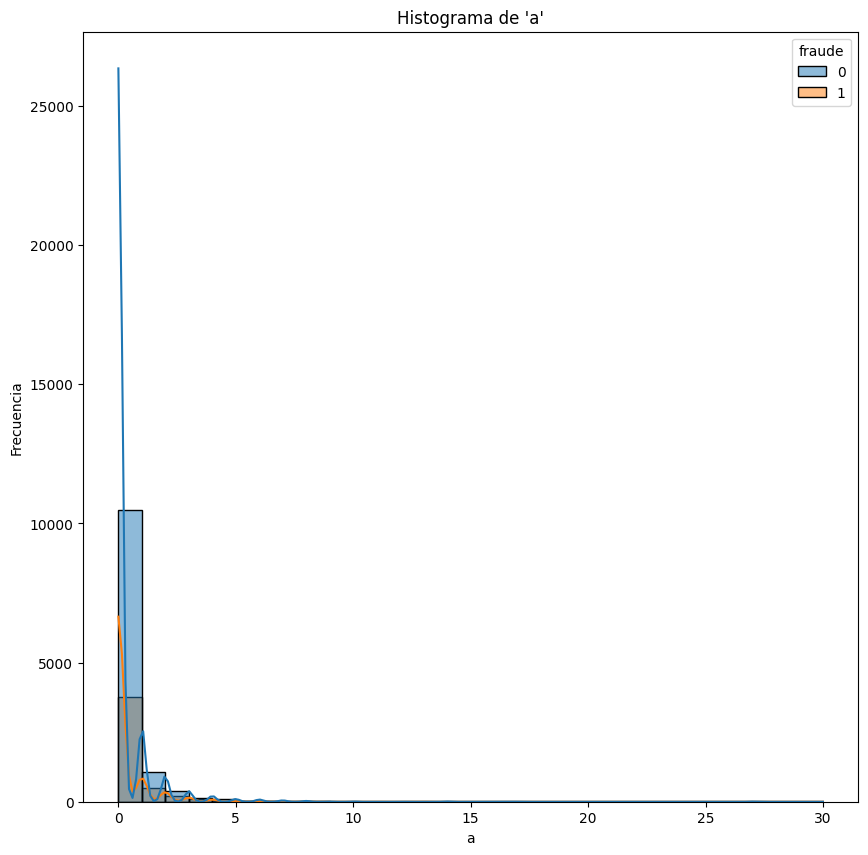

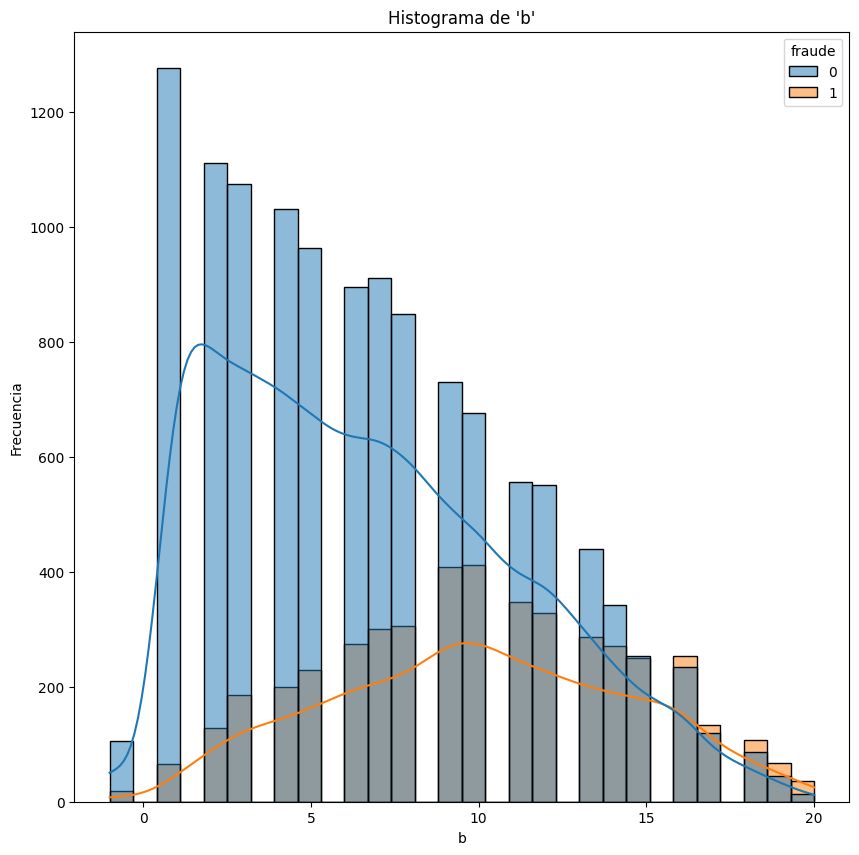

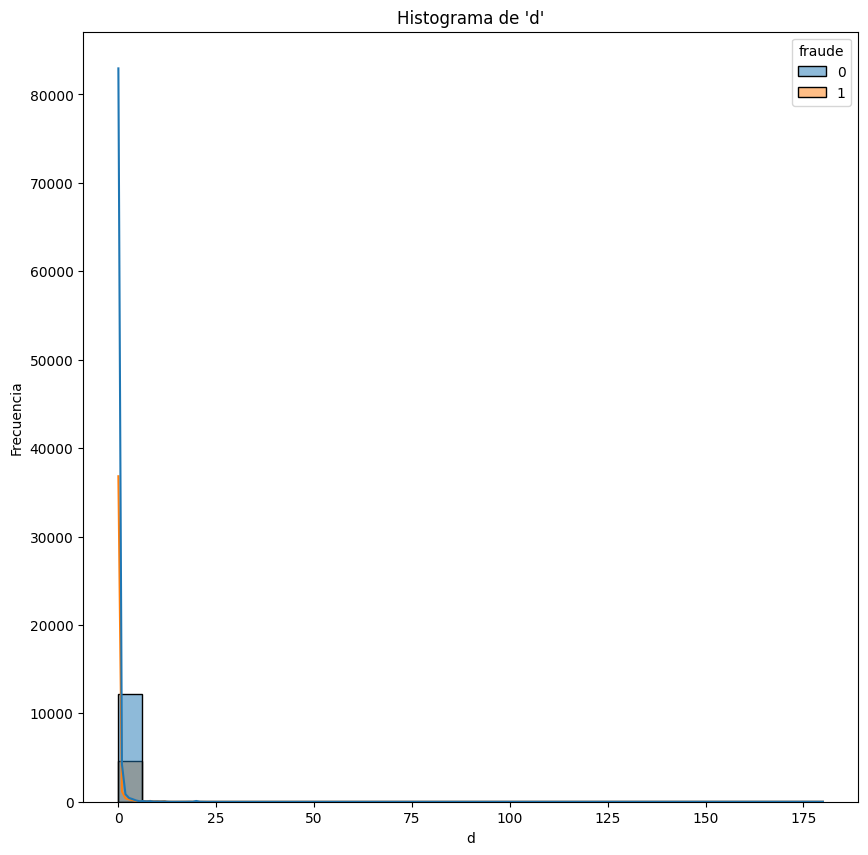

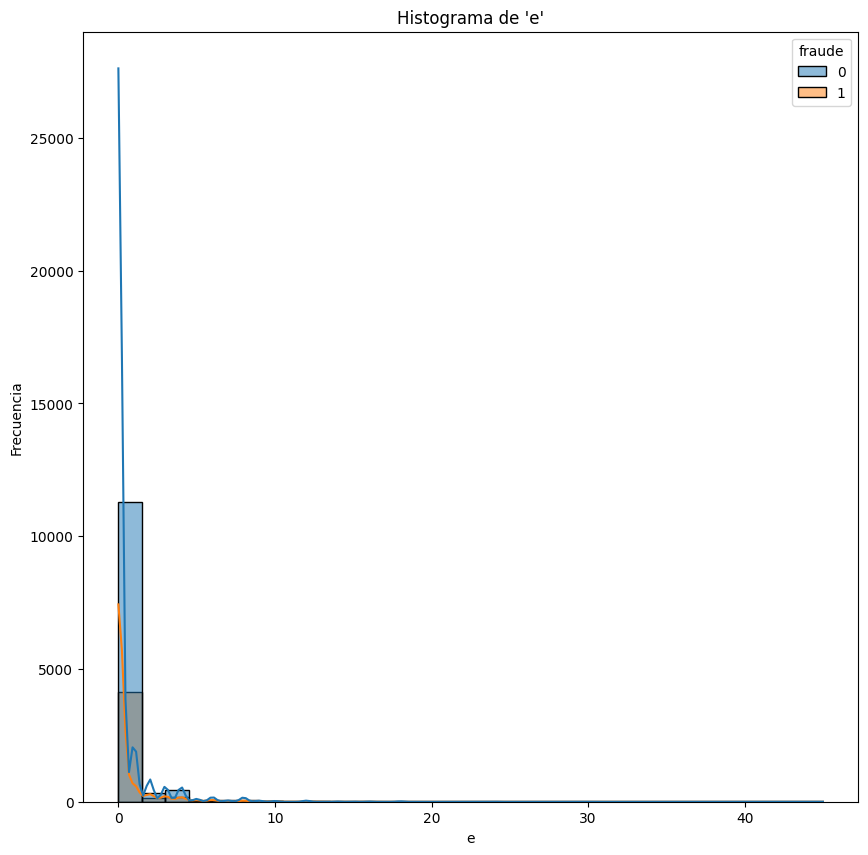

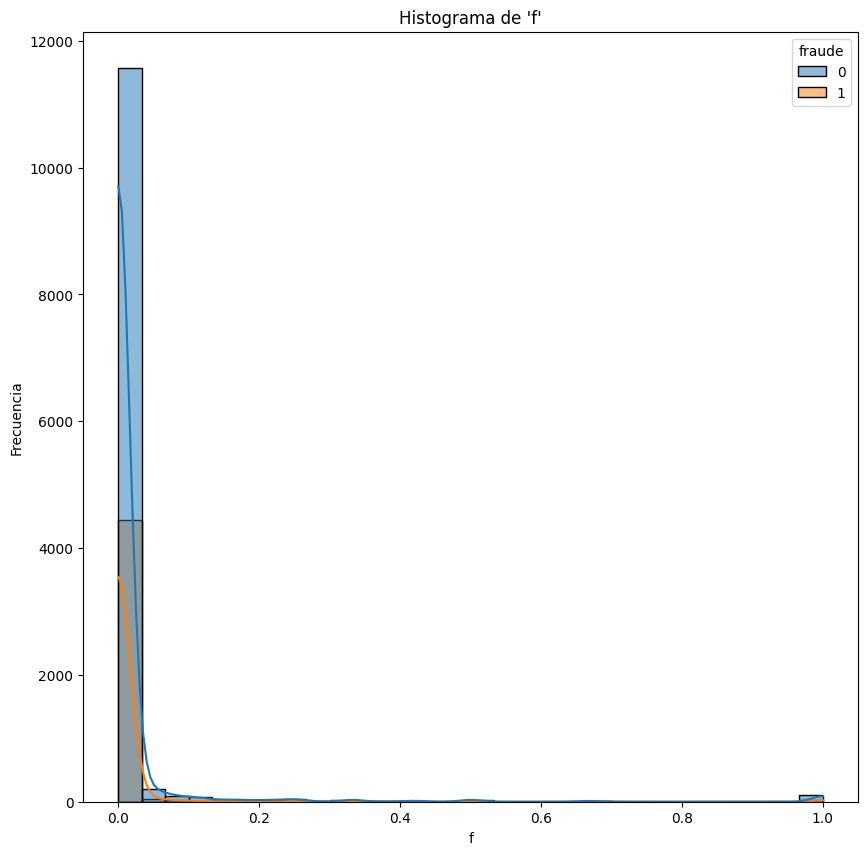

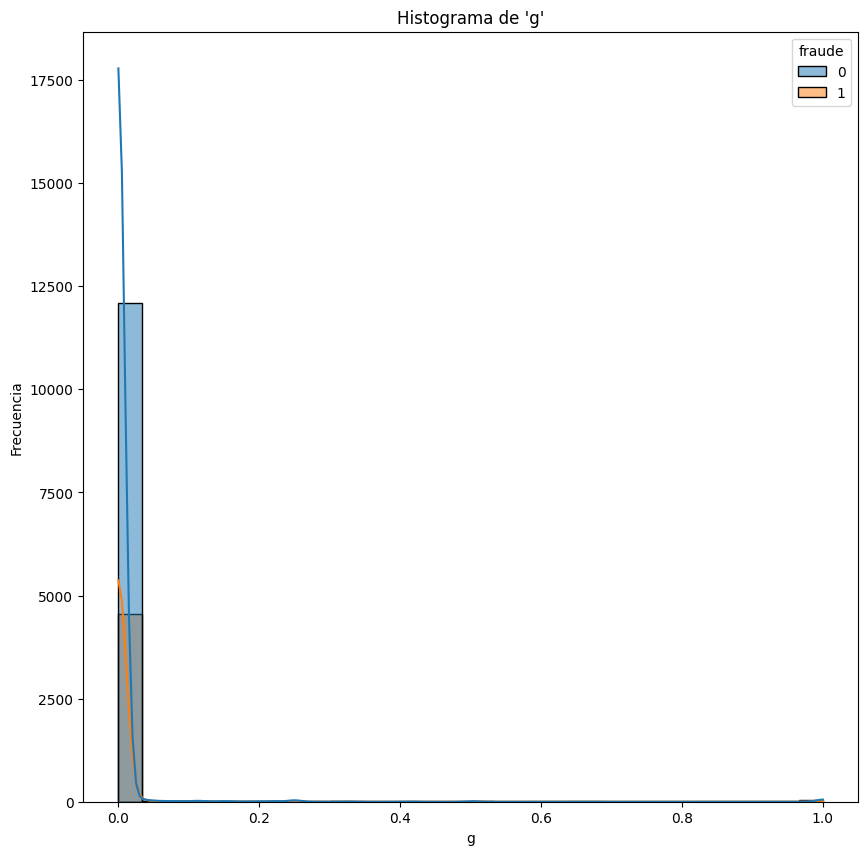

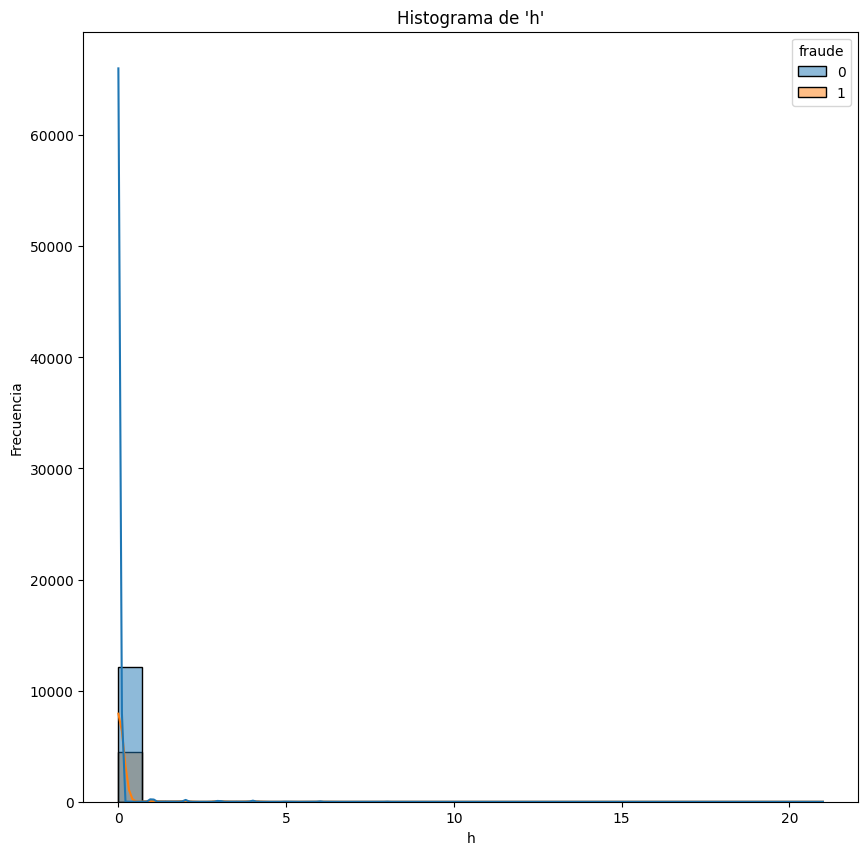

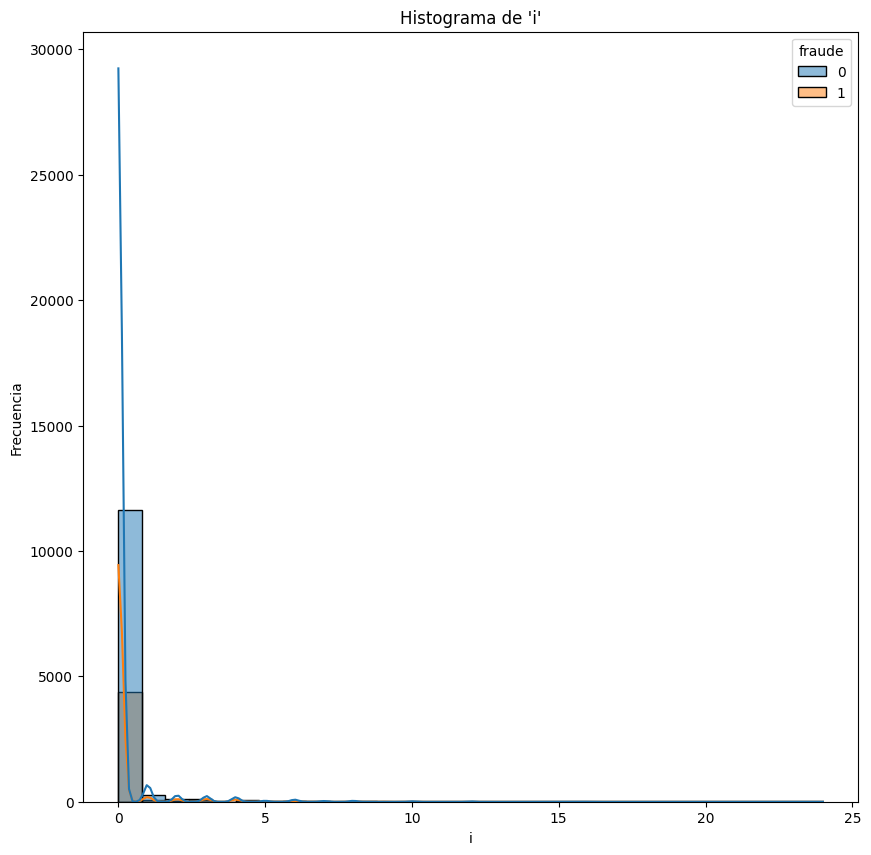

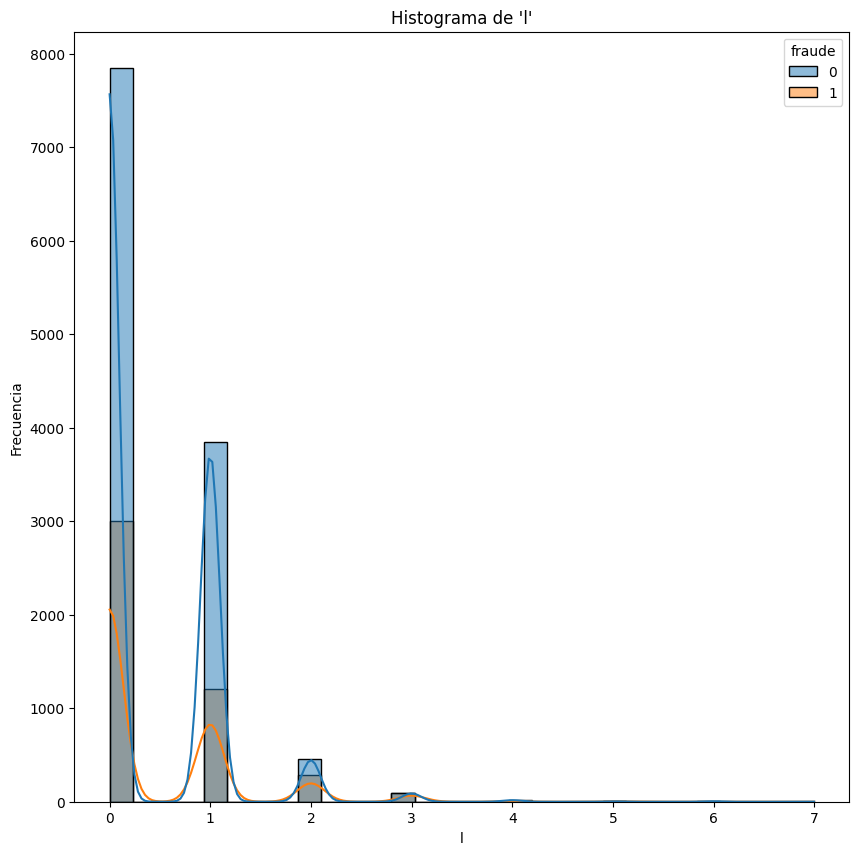

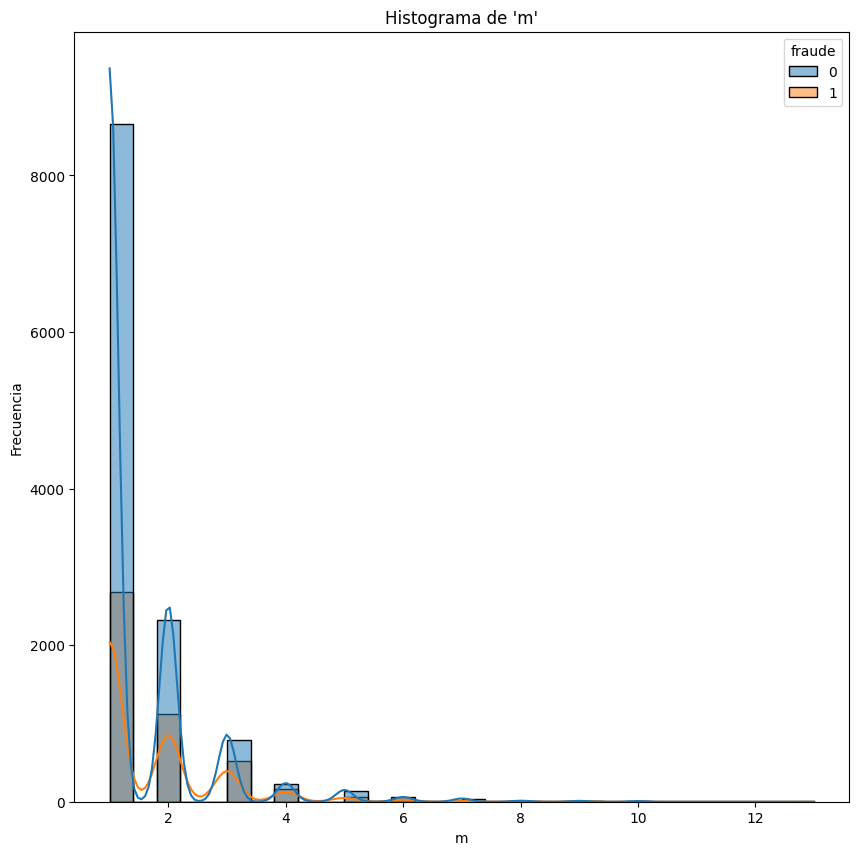

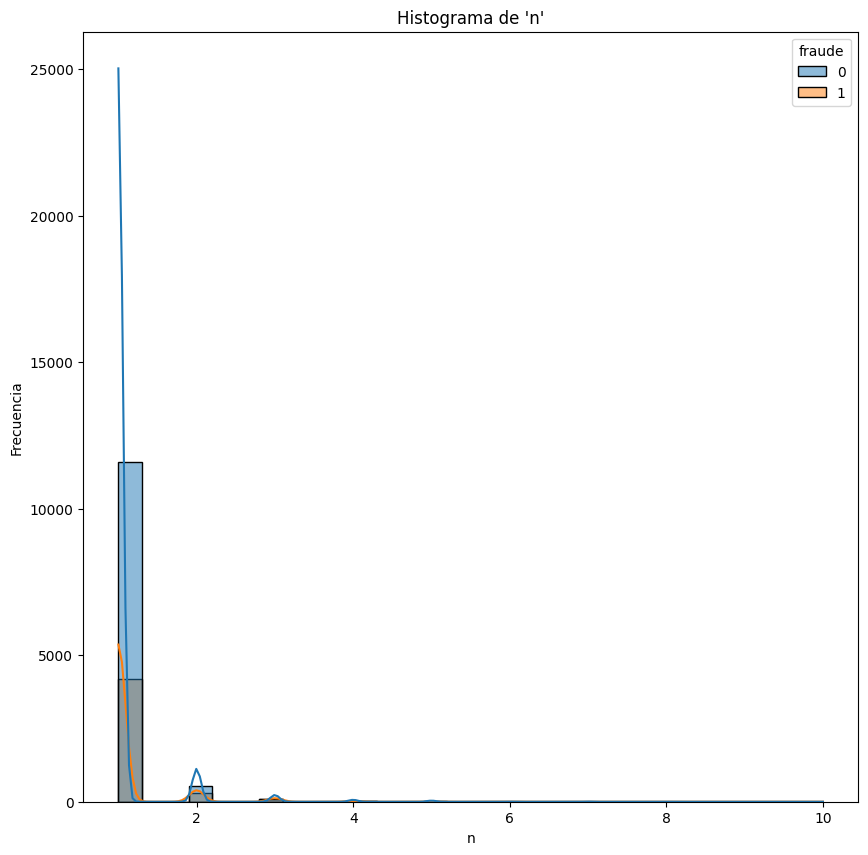

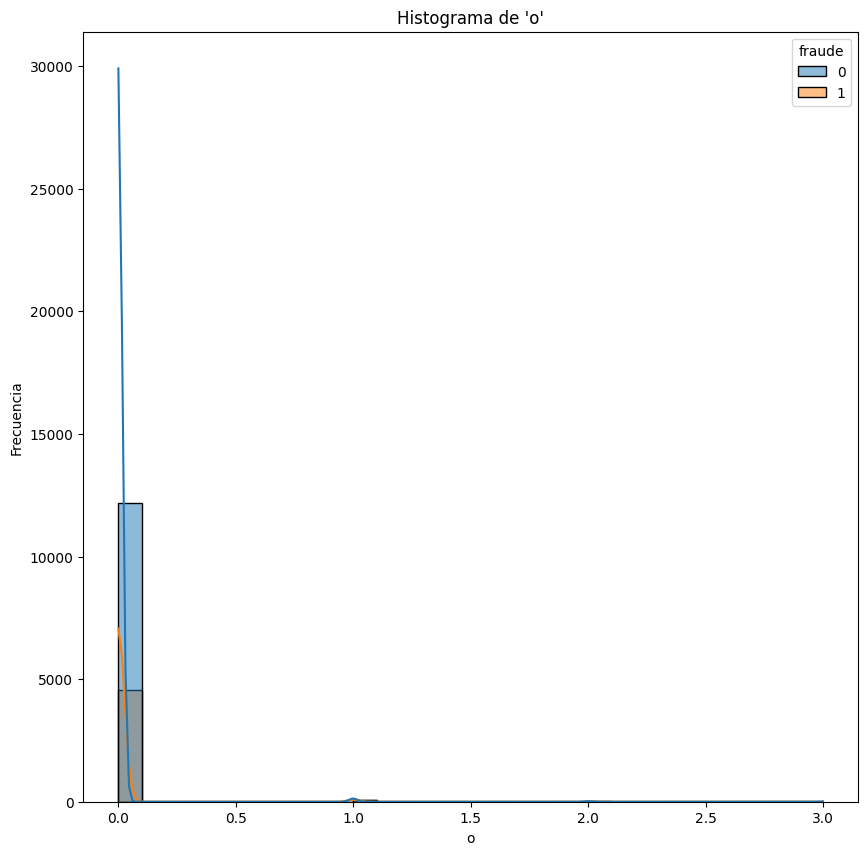

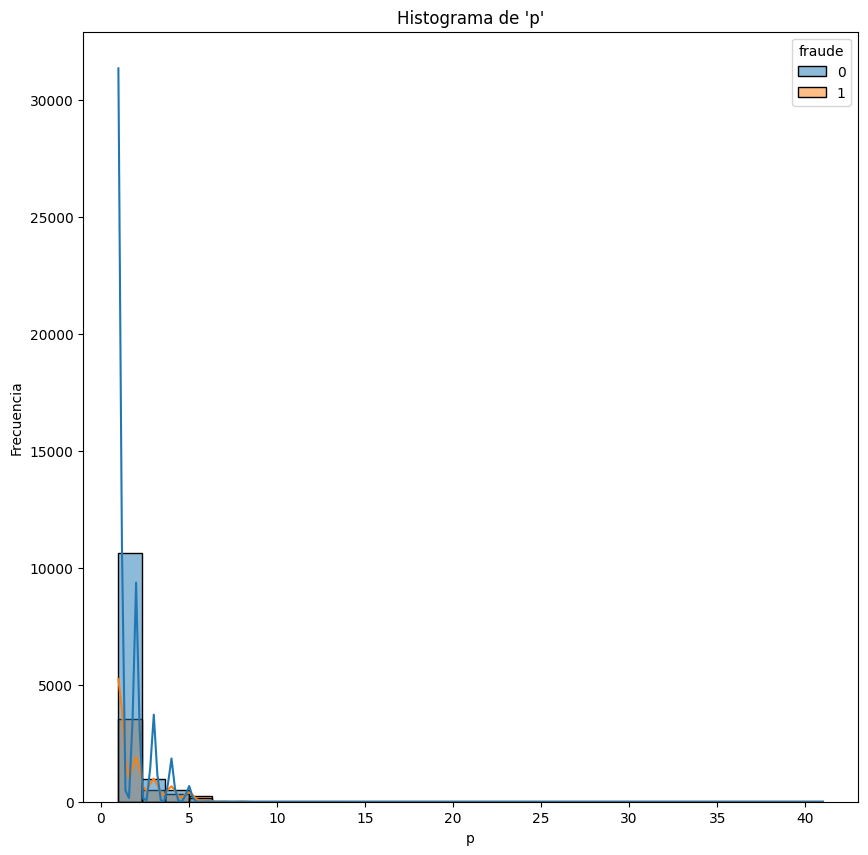

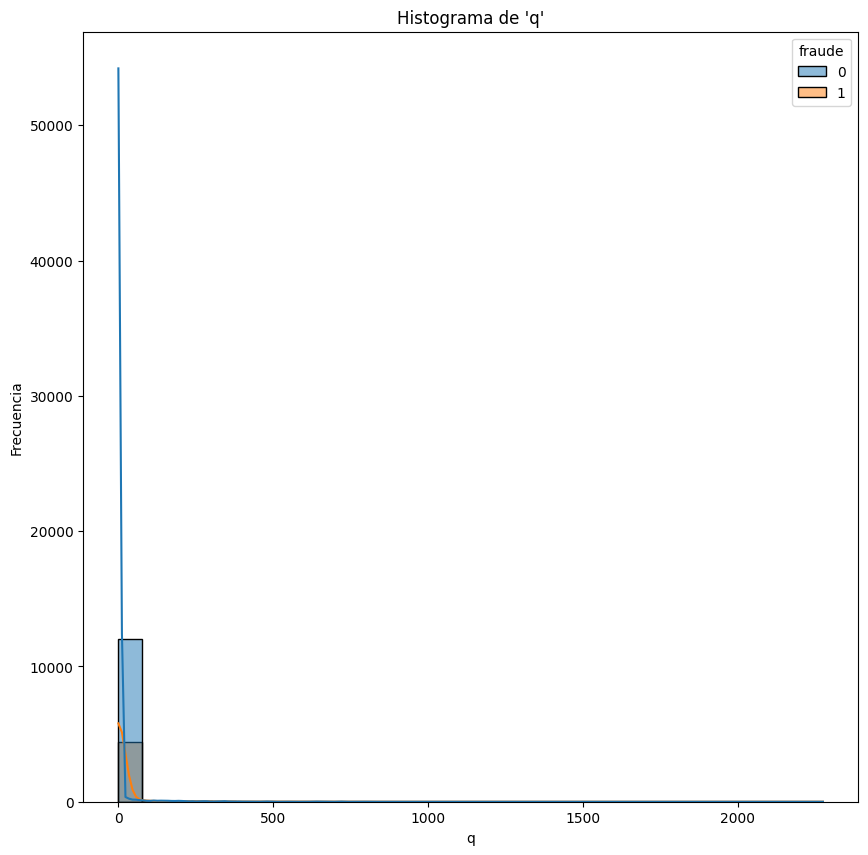

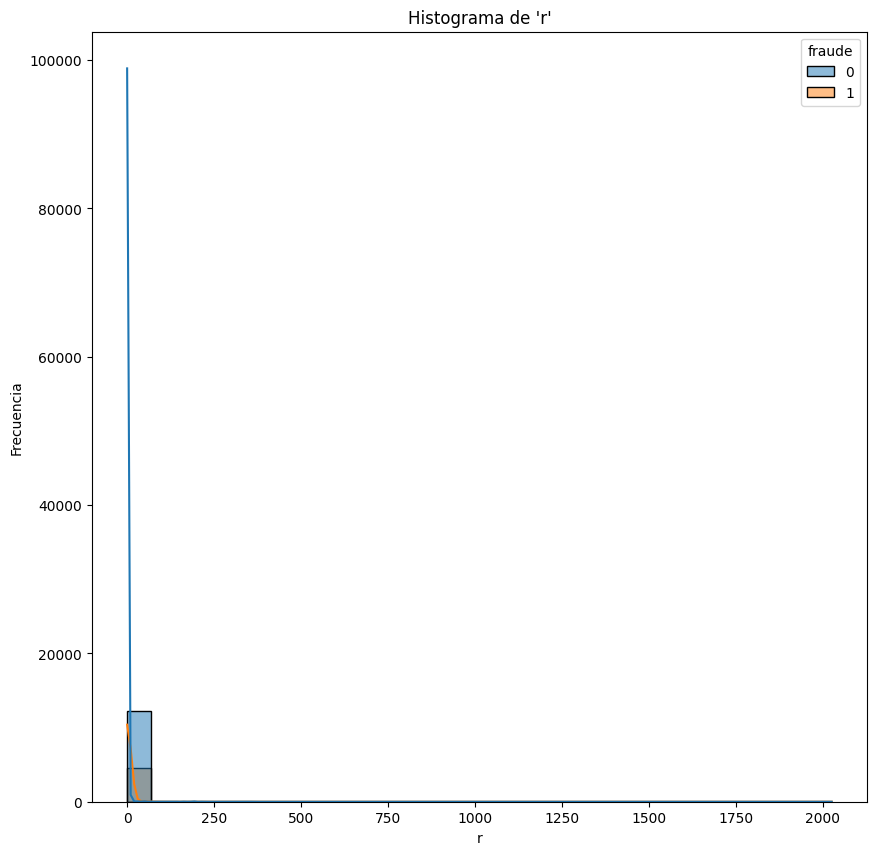

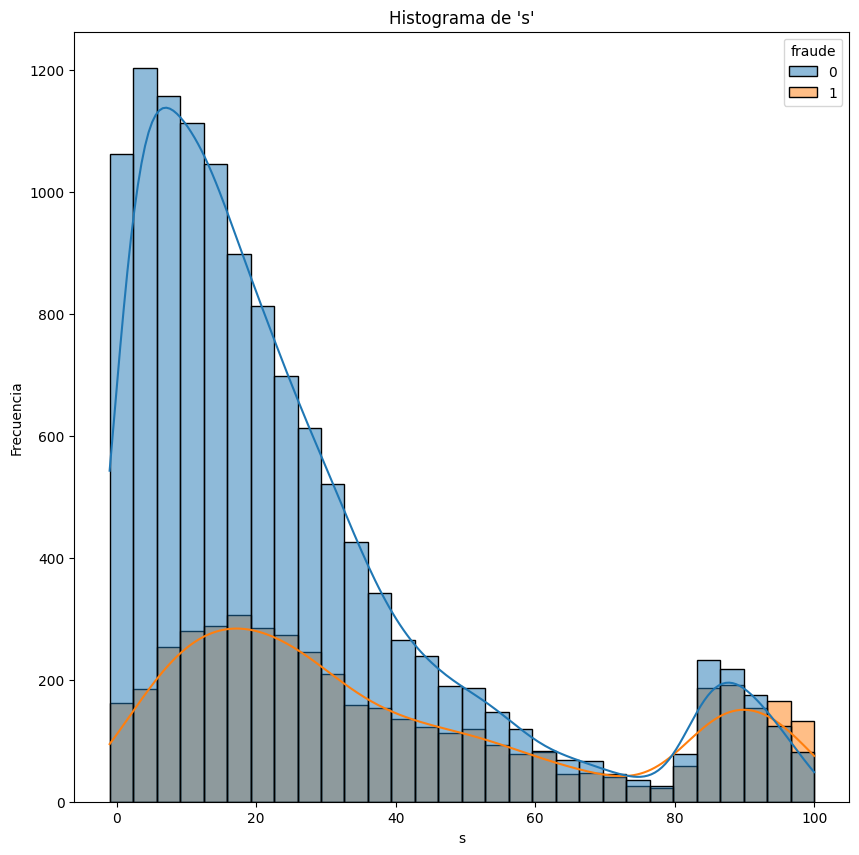

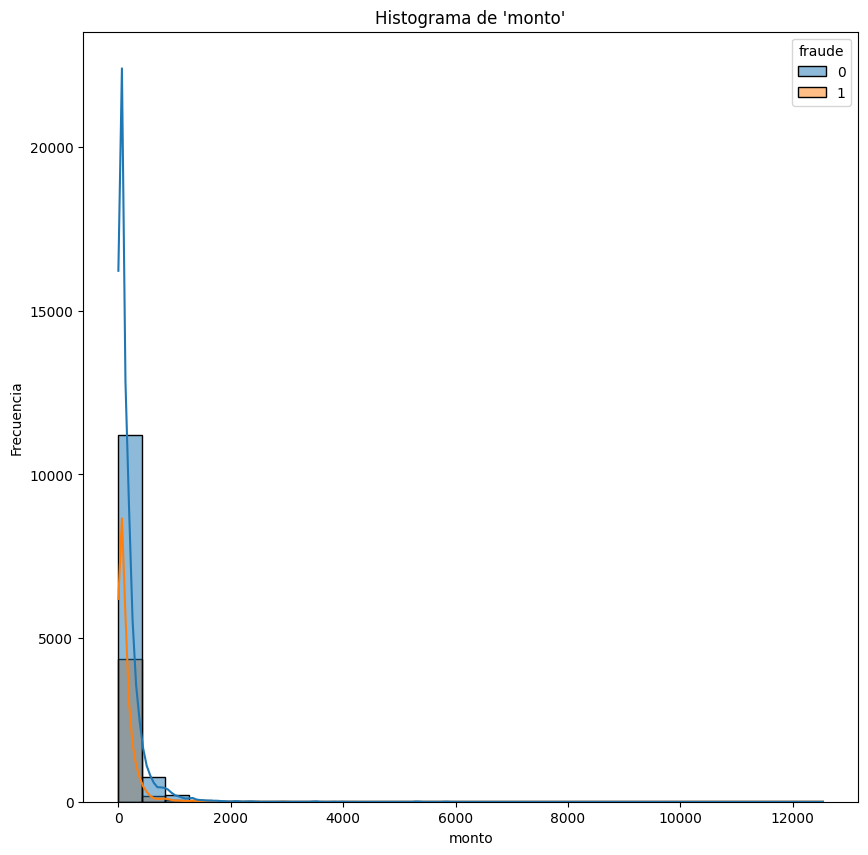

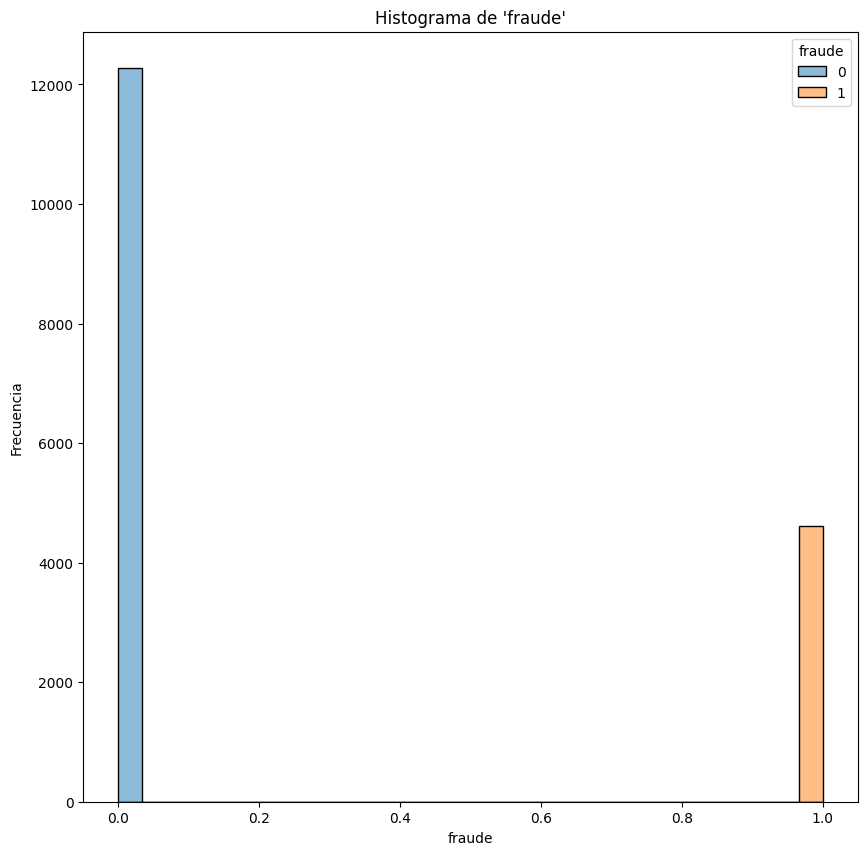

In [20]:
for elemento in datos_numericos.columns:
    graficar_histograma(datos=datos_numericos, columna=elemento, bins=30)

De estos diagramas, sacaremos algunas ideas muy importantes sobre la distribución de las variables con respecto a la variable objetivo, discriminando por clase:

* La columna **b** es una de las que más nos informa sobre la variable objetivo. En este caso, podemos ver que en valores bajos hay más datos pertenecientes a la clase de "no fraudes", mientras que en valores altos, las clases de "fraude" y "no fraude" están más cercanas. De hecho, en los valores más altos, se observa una mayor cantidad de fraudes.

* En las columnas **l**, **m** y **p** podemos decir algo similar: en valores bajos hay menos fraude, y en valores altos hay más fraude.

* Del resto de las columnas no podemos concluir mucho más, ya que las gráficas no son muy claras y parecen estar en un rango muy cercano, lo que dificulta la toma de decisiones.

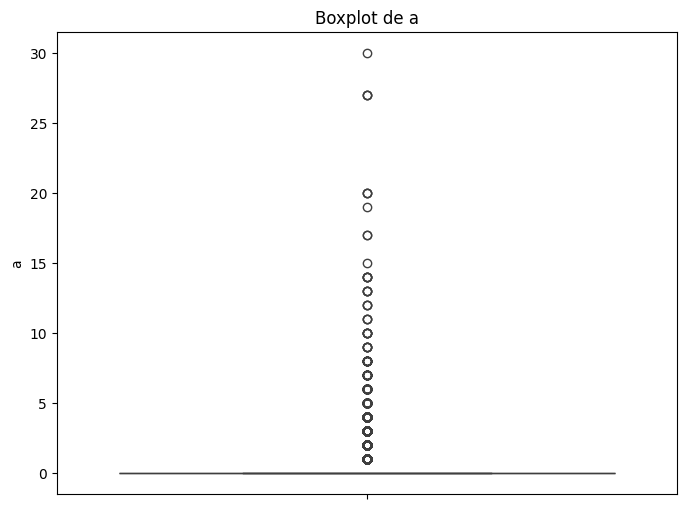

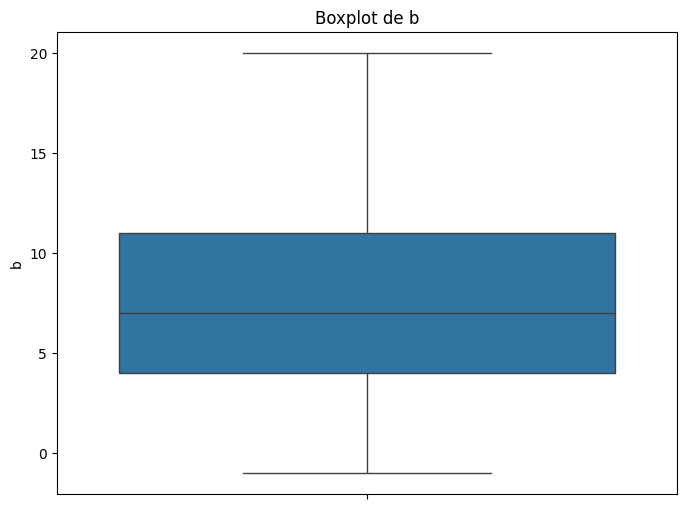

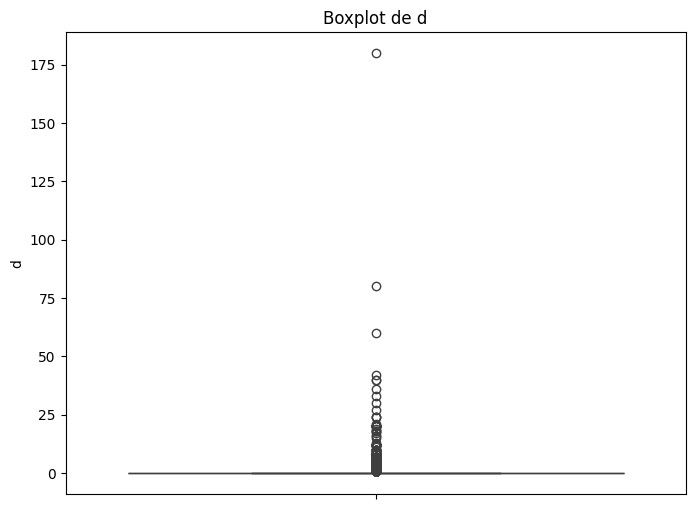

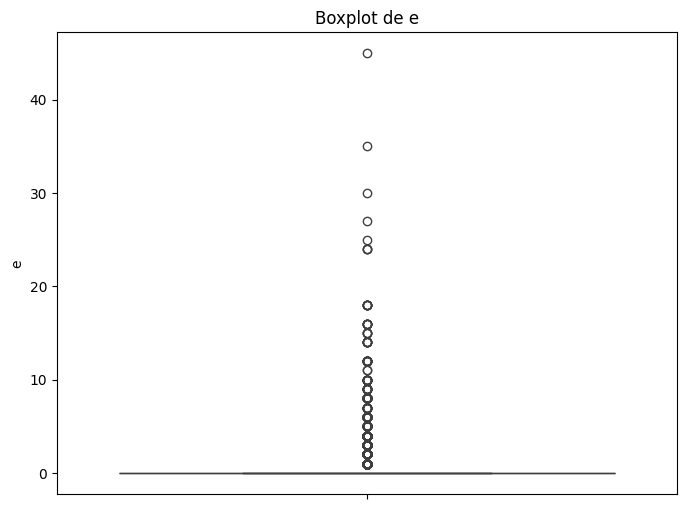

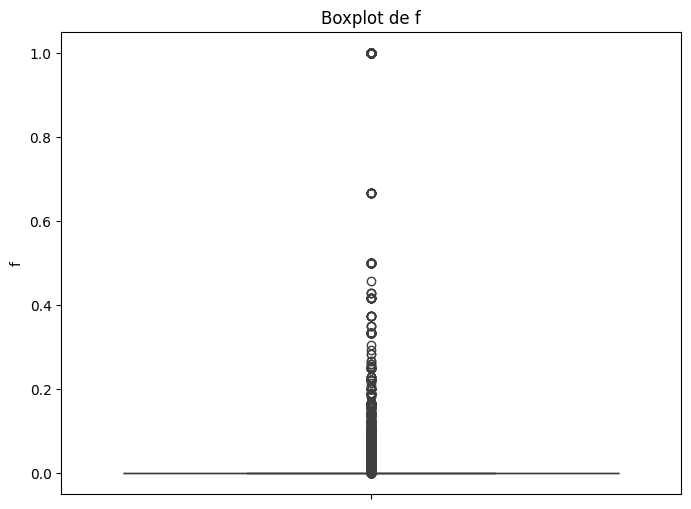

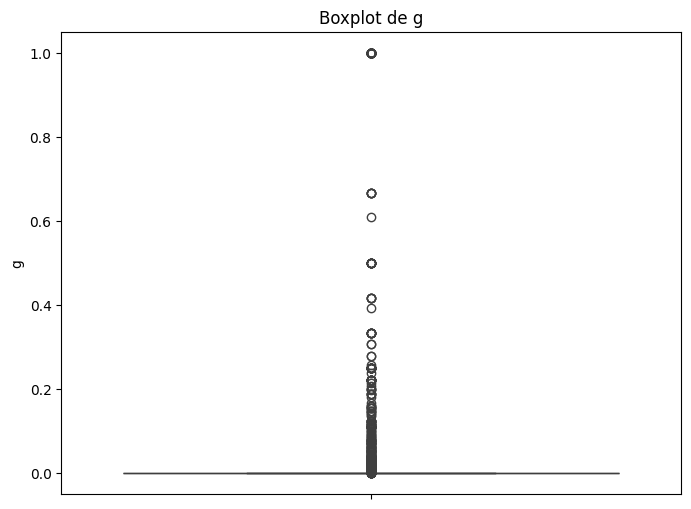

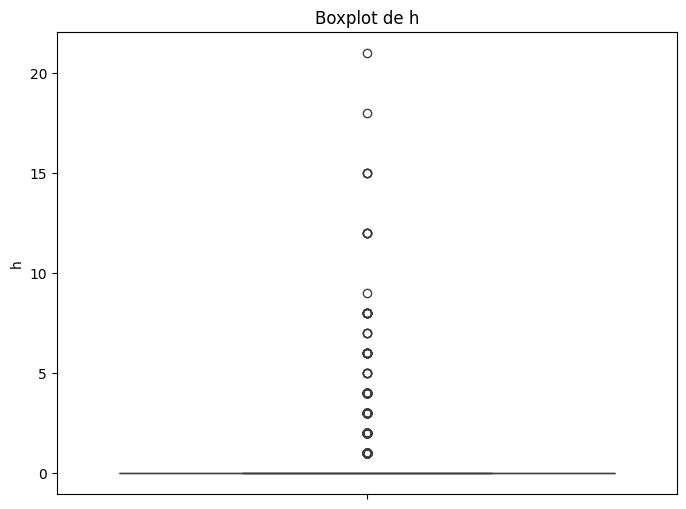

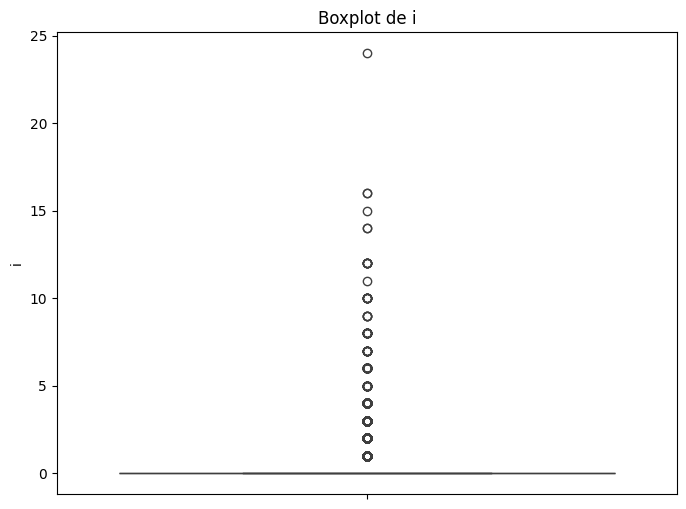

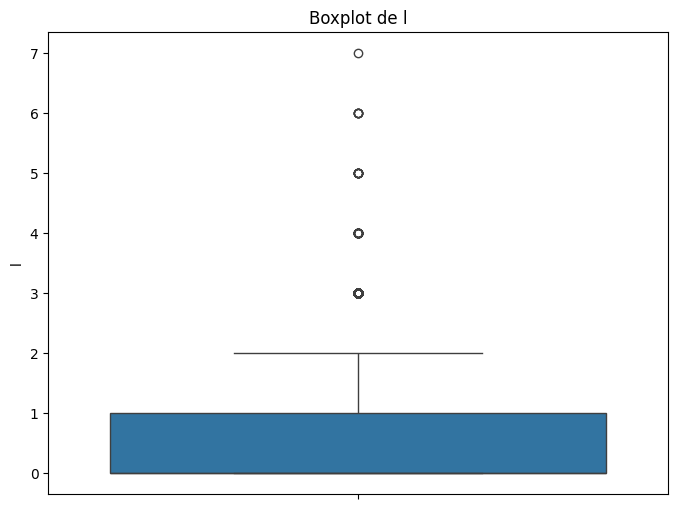

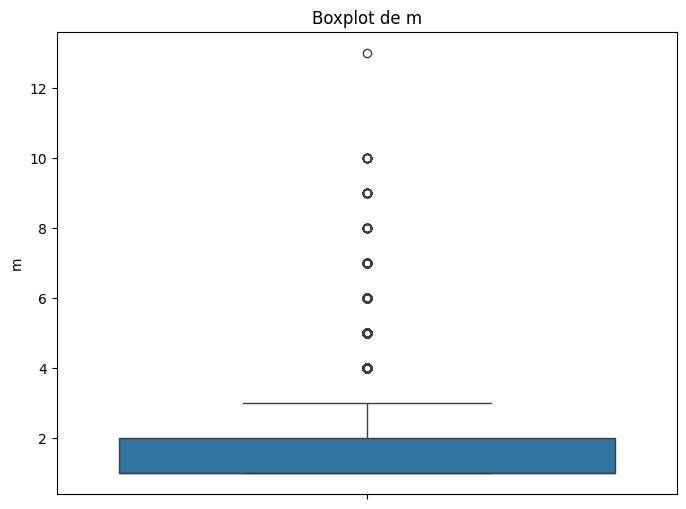

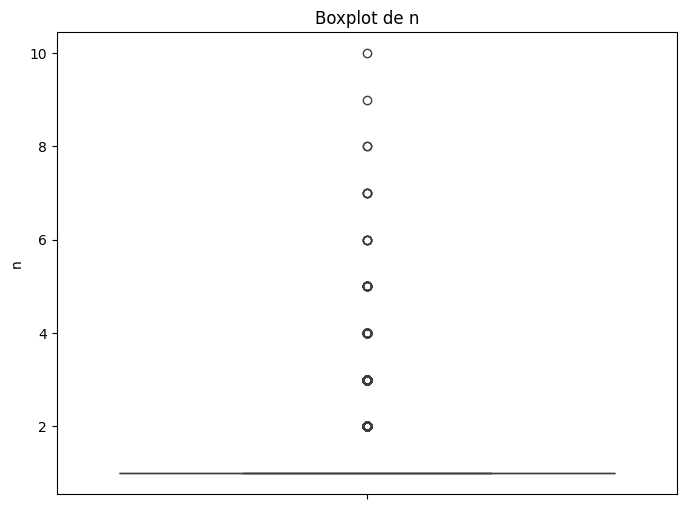

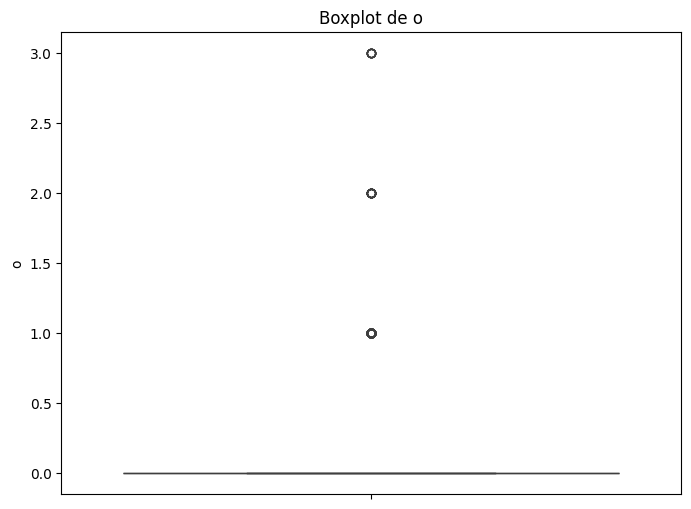

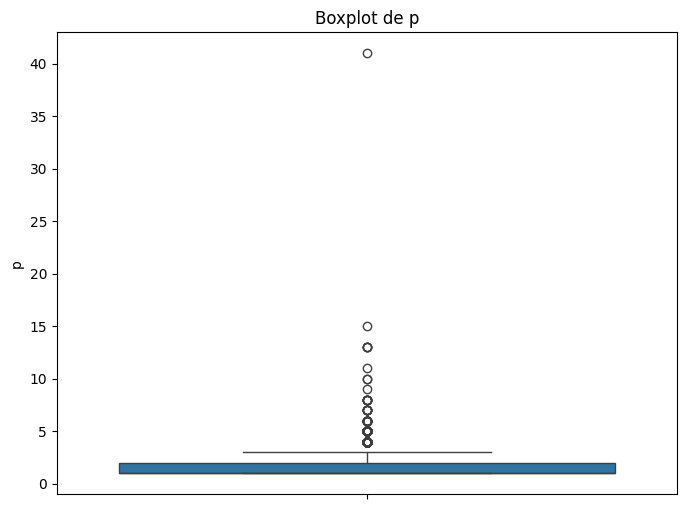

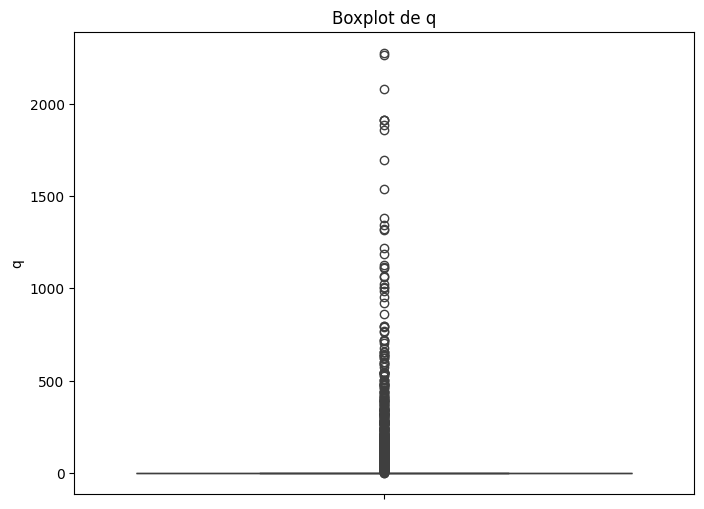

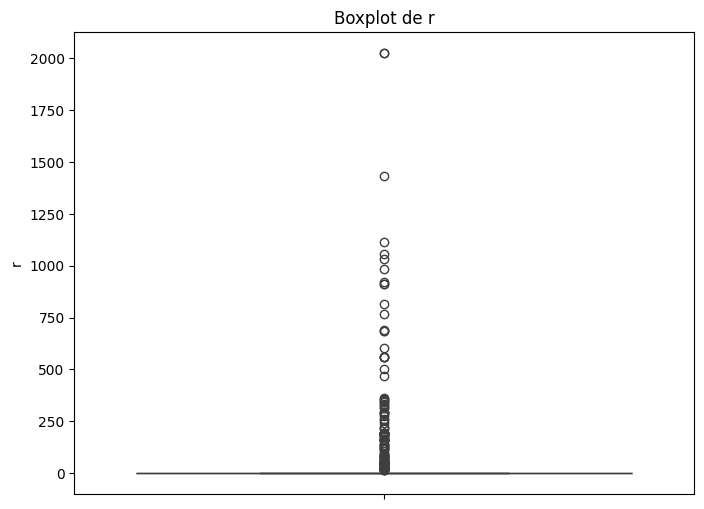

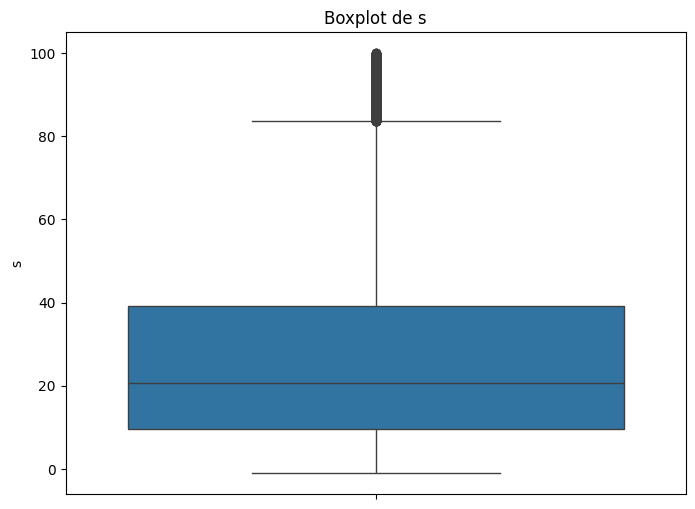

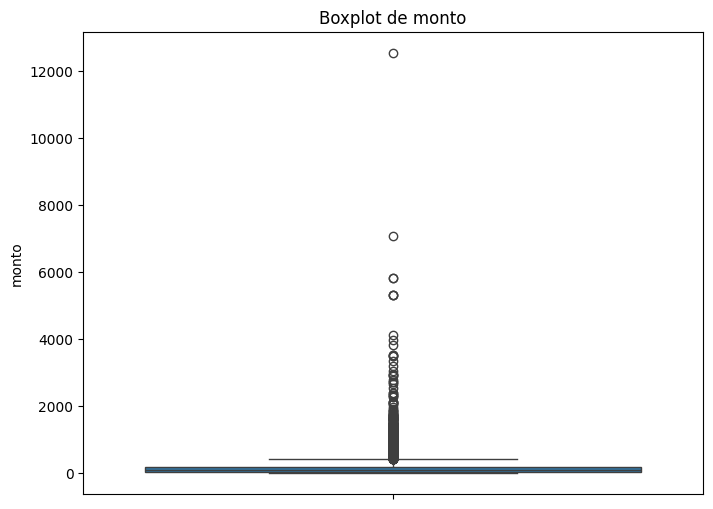

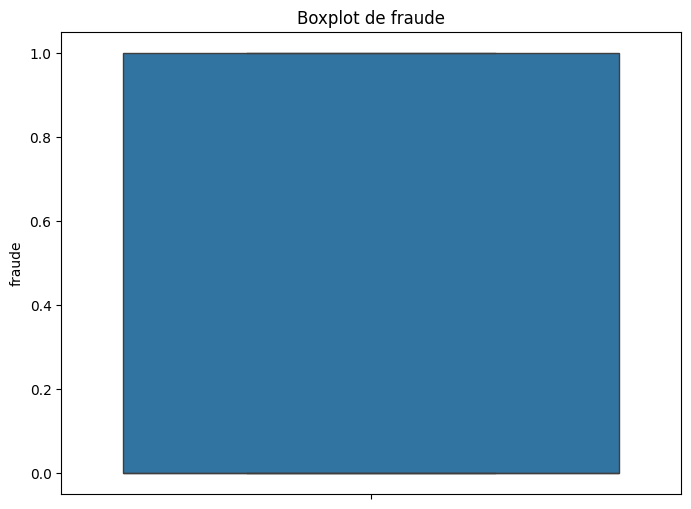

In [21]:
for column in datos_numericos.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=datos_numericos[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Como podemos ver tenemos demasiados datos que son atipicos;

* Impacto en el Análisis y los Modelos: Valores atípicos en una columna pueden afectar considerablemente el rendimiento y la precisión de los modelos de Machine Learning, especialmente en algoritmos sensibles a ellos, como regresiones lineales o redes neuronales. Para mejorar el rendimiento del modelo, es posible que necesites aplicar técnicas de tratamiento de outliers (por ejemplo, normalización, eliminación o transformación de valores atípicos) o usar algoritmos menos sensibles, como los árboles de decisión.

* Identificación de Patrones Anómalos: Una columna con varios valores atípicos podría señalar un patrón de comportamiento inusual que podría ser relevante para análisis de fraudes, detección de anomalías o control de calidad. En tales casos, estos registros pueden ser útiles para entrenar modelos específicos de detección de anomalías.

* Consideración de Escalado y Transformación: Si los datos contienen muchos valores atípicos en una fila, es posible que necesites escalarlos o transformarlos (por ejemplo, usando logaritmos o escalado robusto) para reducir el efecto de estos valores en el análisis.

Ahora vamos a habla de la correlación de Pearson debido a que es una medida estadística que evalúa la fuerza y dirección de la relación lineal entre dos variables numéricas. Es muy útil en análisis de datos porque ayuda a entender si y cómo dos variables están relacionadas entre sí.

La Correlación de Pearson tiene va de -1 a 1.
* +1 significa una correlación lineal positiva perfecta: a medida que una variable aumenta, la otra también lo hace de manera proporcional.
* -1 significa una correlación lineal negativa perfecta: a medida que una variable aumenta, la otra disminuye de manera proporcional.
*  0 indica que no hay correlación lineal entre las variables (no están relacionadas linealmente).

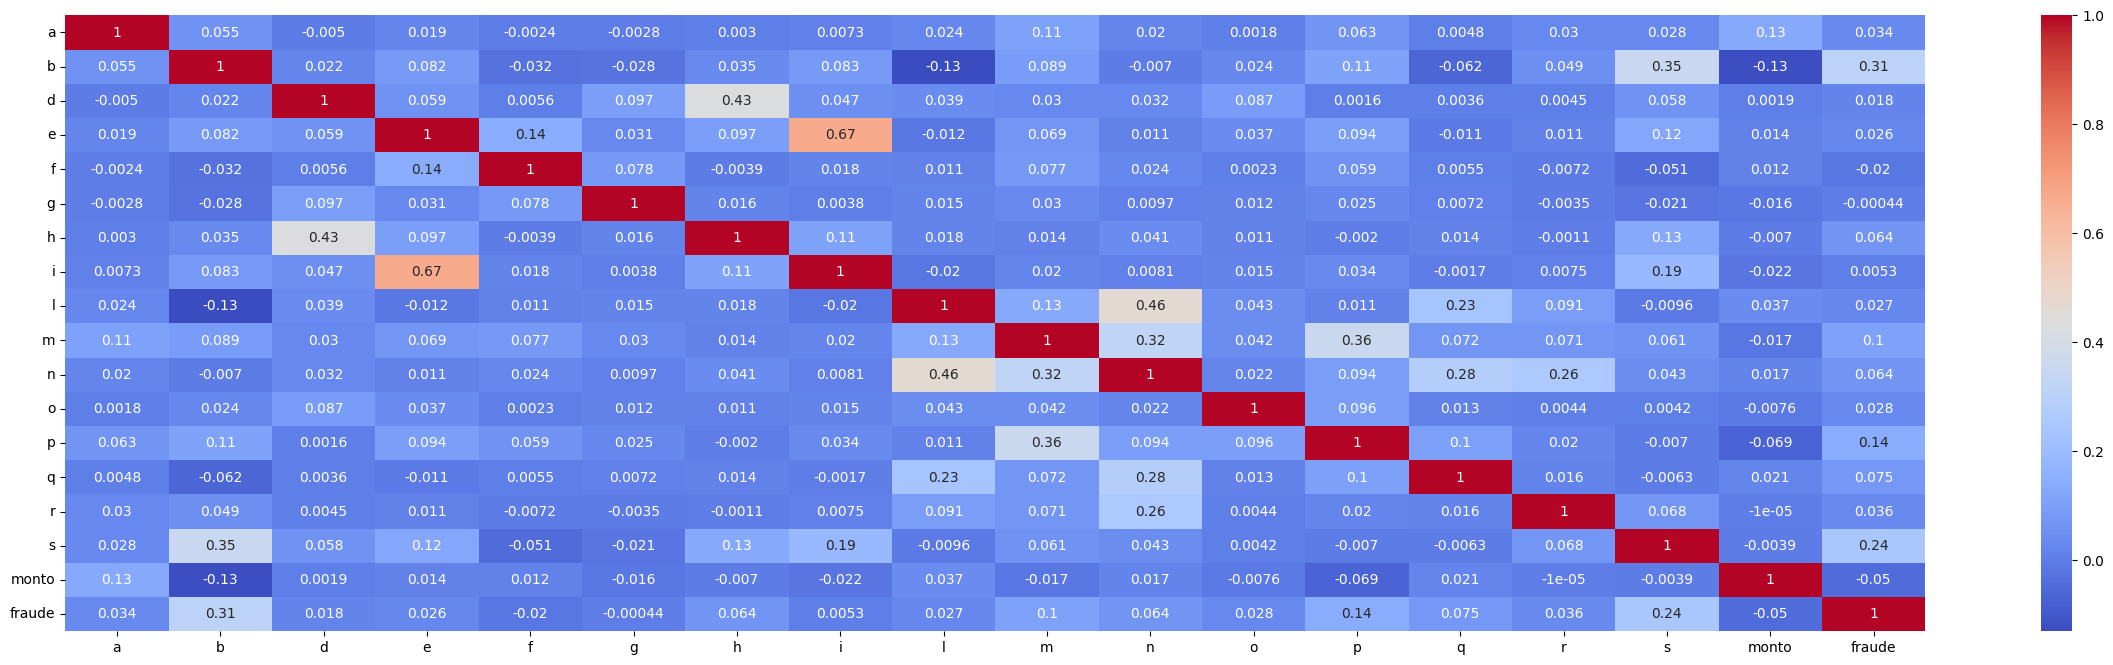

In [22]:
plt.figure(figsize=(30,8))
sns.heatmap(datos_numericos.corr(),cmap='coolwarm',annot = True)
plt.show()

La **correlación de Spearman** mide la **fuerza y dirección de una relación monotónica** entre dos variables. A diferencia de la correlación de Pearson, que solo captura relaciones lineales, la correlación de Spearman es más general y funciona bien para relaciones no lineales, siempre y cuando sean monotónicas (cuando una variable aumenta o disminuye constantemente respecto a la otra, aunque no de forma proporcional).

### Características de la Correlación de Spearman
- **Valores posibles**: Va de **-1 a 1** (igual que Pearson).
  - **+1** indica una relación monotónica positiva perfecta: cuando una variable sube, la otra también sube.
  - **-1** indica una relación monotónica negativa perfecta: cuando una variable sube, la otra baja.
  - **0** indica que no hay relación monotónica entre las variables.

- **Cómo funciona**: La correlación de Spearman se calcula a partir de los **rangos** de los datos (en lugar de los valores originales). Esto la hace menos sensible a valores atípicos y adecuada para datos que no siguen una relación lineal.

### ¿Para qué sirve la Correlación de Spearman?
1. **Detectar relaciones monotónicas**: Spearman es útil cuando sospechas que las variables tienen una relación consistente (una sube mientras la otra sube o baja), pero no necesariamente lineal. 

2. **Trabajar con datos no lineales**: Si tienes variables que están relacionadas de manera no lineal, como en relaciones cuadráticas o exponenciales, la correlación de Spearman puede captar esta relación mejor que Pearson.

3. **Resistente a valores atípicos**: Como Spearman se basa en rangos, es menos afectado por valores atípicos que Pearson. Esto es útil en conjuntos de datos donde existen valores extremos que podrían distorsionar la relación entre las variables.

4. **Usar variables ordinales**: En datos ordinales (donde las variables representan categorías con orden, pero no necesariamente con distancias iguales), Spearman es adecuado, ya que solo utiliza el orden de los valores.

### Ejemplo en análisis de datos
Supongamos que en un análisis de fraude encuentras que la variable "monto de transacción" tiene una relación compleja con la variable "fraude" (por ejemplo, transacciones muy pequeñas y muy grandes podrían tener diferentes patrones de fraude). Si esta relación no es lineal, la correlación de Pearson podría ser inadecuada, pero la correlación de Spearman podría capturar la tendencia monotónica, mostrando que a ciertos rangos de "monto de transacción" hay una mayor incidencia de fraude.

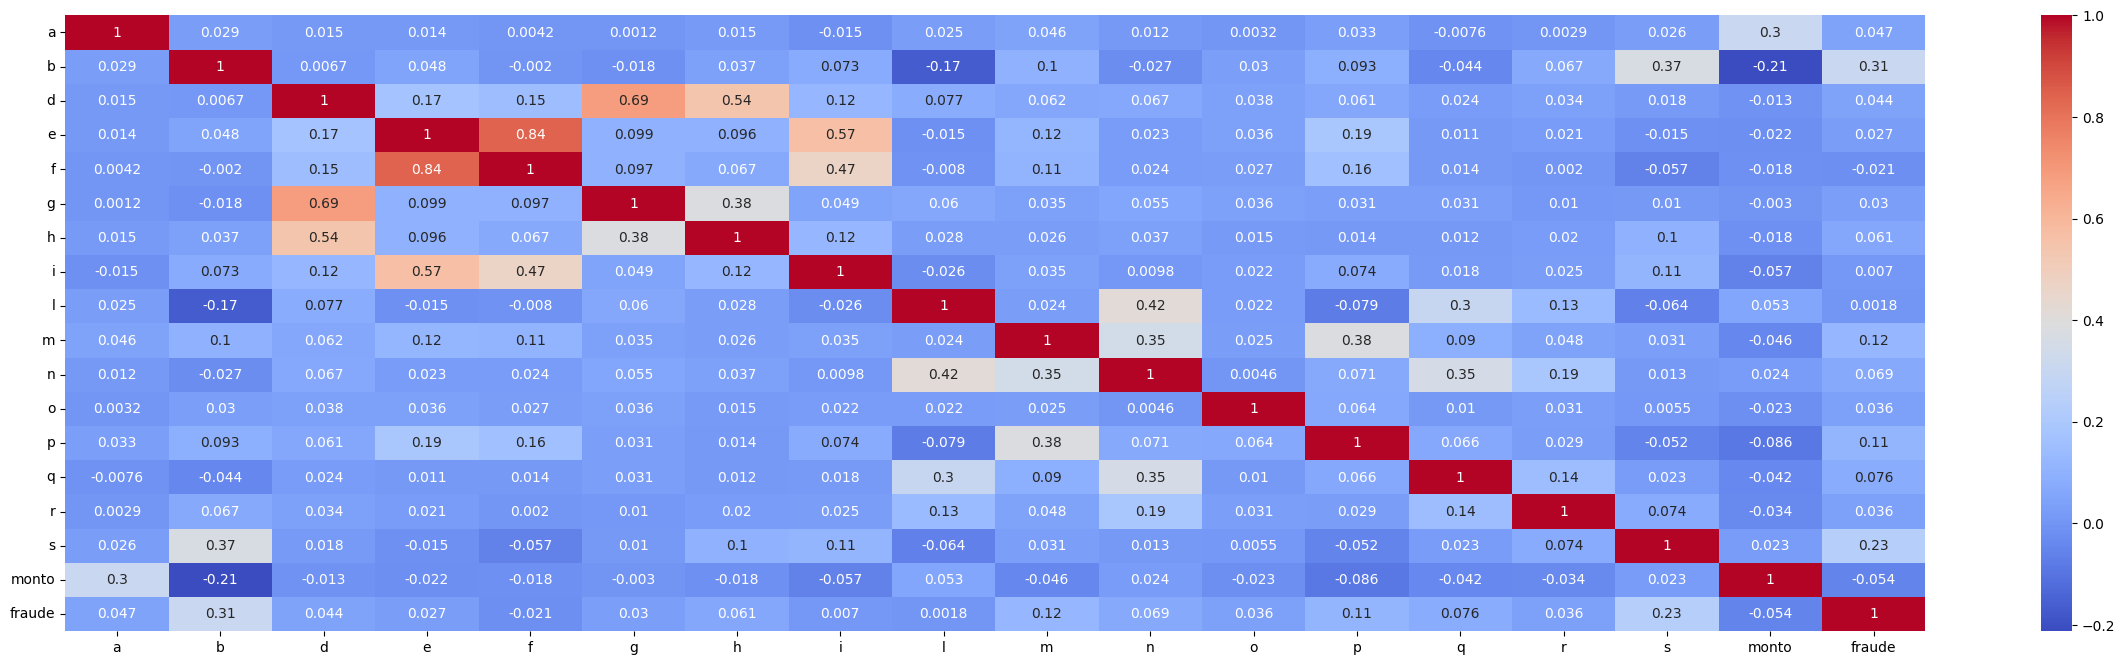

In [23]:
plt.figure(figsize=(30,8))
sns.heatmap(datos_numericos.corr(method="spearman"),cmap='coolwarm',annot = True)
plt.show()

In [24]:
correlaciones=pd.DataFrame({'columnas':datos_numericos.columns,'correlacion_person':datos_numericos.corr()['fraude'],'correlacion_sperman':datos_numericos.corr(method="spearman")['fraude']})
#correlaciones.sort_values('correlacion_person',ascending=False,inplace=True)
correlaciones

,columnas,correlacion_person,correlacion_sperman
a,a,0.034159,0.047434
b,b,0.307906,0.306547
d,d,0.018145,0.044352
e,e,0.026134,0.026666
f,f,-0.020182,-0.021410
g,g,-0.000444,0.029561
h,h,0.064364,0.061043
i,i,0.005266,0.006980
l,l,0.027128,0.001840
m,m,0.103776,0.123307


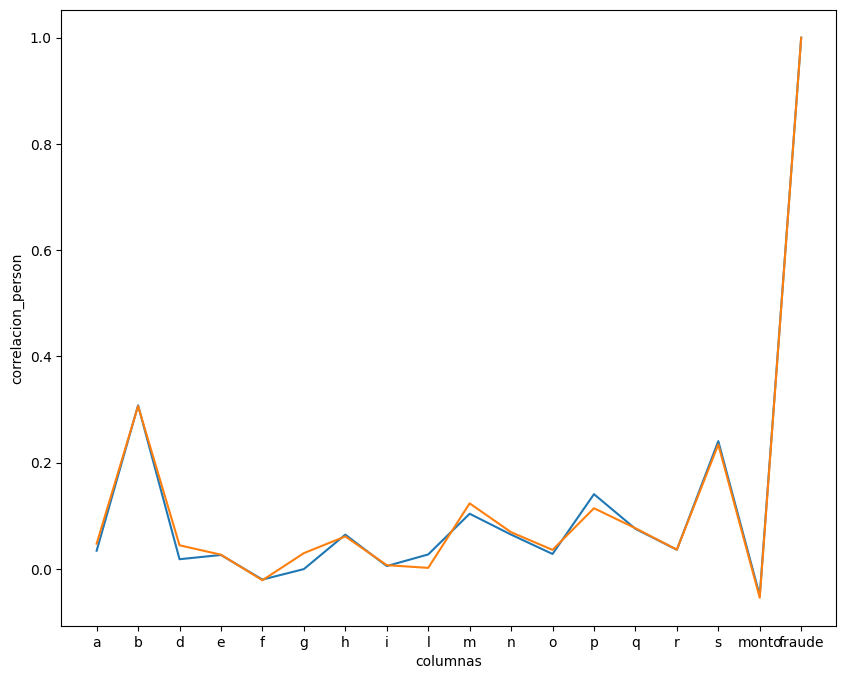

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(x='columnas',y='correlacion_person',data=correlaciones)
sns.lineplot(x='columnas',y='correlacion_sperman',data=correlaciones)
plt.xticks(rotation=0)
plt.show()

## datos categoricos


Ahora hagamos un tratado de datos especiales para los datos string que en este caso solo tenemos lo de los paises

In [26]:
datos_categoricos = datos.select_dtypes(include=['object'])
datos_categoricos["fraude"] = datos["fraude"]

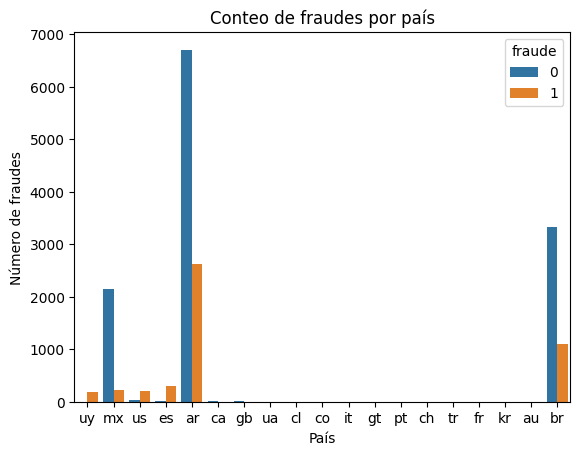

In [27]:
sns.countplot(data=datos_categoricos, x='j',hue='fraude')
plt.title('Conteo de fraudes por país')
plt.xlabel('País')
plt.ylabel('Número de fraudes')
plt.show()


Como podemos apreciar, es interesante observar que en países como Uruguay, México y Estados Unidos hay una mayor probabilidad de que la transacción sea fraudulenta. Esto podría traer problemas, ya que podría afectar la reputación de algunos países. Sin embargo, es un dato importante que merece ser mencionado.



In [28]:
paises=datos_categoricos['j'].value_counts()
paises_name=paises.index
paises_con__fraude=datos_categoricos.groupby('j')['fraude'].sum()
paises_sin__reafude=datos_categoricos.groupby('j')['fraude'].count()-datos_categoricos.groupby('j')['fraude'].sum()

In [29]:
frme_paises=pd.DataFrame({'paises':paises_name,'cantidad':paises,'fraude':paises_con__fraude,'sin_fraude':paises_sin__reafude})
frme_paises

,paises,cantidad,fraude,sin_fraude
j,,,,
ar,ar,9329,2626,6703
au,br,1,0,1
br,mx,4428,1099,3329
ca,es,12,0,12
ch,us,1,0,1
cl,uy,1,0,1
co,ca,1,0,1
es,gb,314,295,19
fr,gt,2,0,2


No obstante, esta categoría resulta ser muy sensible porque hay países donde solo se registran datos de fraude, lo que puede hacer que el modelo se sobreajuste fácilmente. Esto se debe a que, cada vez que una persona elige un país donde hubo fraudes, el programa podría asociar automáticamente que se trata de fraude, aunque los nuevos datos indiquen lo contrario.

En este caso, la solución que he pensado es la siguiente: si agrupamos países por regiones, sería poco práctico porque no hay suficiente cantidad de países para representar adecuadamente una región. Además, si los agrupo de otra forma, seguiría siendo muy desbalanceado debido a que hay países que no tienen muestras de ambas clases. Por lo tanto, he decidido clasificar los países en tres clases:

* **Alta probabilidad de fraude**: serán los países con más casos de fraude que de no fraude.
* **Media probabilidad de fraude**: serán los países donde el índice de fraude está cercano al índice de no fraude.
* **Baja probabilidad de fraude**: serán los países en los que no se registraron fraudes.

In [30]:
# funcion para calcular los nuevos indices 

def porcentaje_fraude(cantidad_datos:list, fraude:list):
    clase_asignada=[]
    for index in range(len(cantidad_datos)):
        if fraude[index] == 0:
            clase_asignada.append(0)
        else:
            porcentaje=(fraude[index]*100)/cantidad_datos[index] 
            if porcentaje <= 55 and porcentaje>=45:
                clase_asignada.append(1)
            else: 
                clase_asignada.append(2) 
    return clase_asignada

cantidad_de_datos=list(frme_paises["cantidad"])
cantidad_de_fraude=list(frme_paises["fraude"])
asigacion_calse=porcentaje_fraude(cantidad_datos=cantidad_de_datos,fraude=cantidad_de_fraude)

frme_paises["clase_perteneciente"]=asigacion_calse
frme_paises

,paises,cantidad,fraude,sin_fraude,clase_perteneciente
j,,,,,
ar,ar,9329,2626,6703,2
au,br,1,0,1,0
br,mx,4428,1099,3329,2
ca,es,12,0,12,0
ch,us,1,0,1,0
cl,uy,1,0,1,0
co,ca,1,0,1,0
es,gb,314,295,19,2
fr,gt,2,0,2,0


In [31]:
datos_2=frme_paises.loc[frme_paises["clase_perteneciente"]==2]
paises_2=list(datos_2["paises"].index)
datos_0=frme_paises.loc[frme_paises["clase_perteneciente"]==0]
datos_0=list(datos_0["paises"].index)

Como podemos apreciar, nos damos cuenta de que solo nos quedan dos clases porque los datos de fraude y no fraude tampoco están balanceados. Entonces, solo tenemos dos clases, que serán: alta probabilidad de fraude y baja probabilidad de fraude.

## Etapa 2

Para comenzar esta etapa, cargaremos las librerías que utilizaremos a lo largo del proceso que llevaremos a cabo aquí:

* **scikit-learn** (`sklearn`): Esta es una de las librerías más populares y ampliamente utilizadas en Python para Machine Learning. Proporciona una gran variedad de herramientas para preprocesamiento de datos, modelado, selección de características, validación de modelos y evaluación. Ofrece una implementación eficiente de muchos algoritmos de aprendizaje supervisado y no supervisado, así como herramientas para la evaluación y el ajuste de modelos. Al importar `sklearn`, se pueden acceder a módulos como `sklearn.model_selection` para la división de datos, `sklearn.preprocessing` para la normalización y escalado de datos, y `sklearn.ensemble` para algoritmos como Random Forest y Gradient Boosting, entre otros.

<img src="imagenes/descarga.png" width="200" style="display: block; margin: auto;">

* **xgboost**: XGBoost (Extreme Gradient Boosting) es una poderosa biblioteca de aprendizaje automático basada en el método de gradient boosting. Fue diseñada principalmente para problemas de clasificación y regresión y es altamente valorada por su eficiencia y precisión en competencias de ciencia de datos. XGBoost mejora el algoritmo de boosting tradicional usando una técnica de optimización de gradientes. Esto permite construir modelos mediante árboles de decisión optimizados en secuencia, minimizando errores a cada paso y mejorando la precisión del modelo.

<img src="imagenes/xgboost.png" width="200" style="display: block; margin: auto;">


## Limpieza de datos

La limpieza de datos es una de las etapas más cruciales en el proceso de Machine Learning porque garantiza que el modelo trabaje con información precisa y consistente. Durante esta fase, se identifican y corrigen problemas como valores faltantes, errores en los datos y la eliminación de características irrelevantes o redundantes. Una base de datos limpia permite a los algoritmos de aprendizaje automático extraer patrones de manera más eficiente, mejorando la precisión y la fiabilidad del modelo. Además, facilita la creación de modelos que generalicen mejor, evitando que el modelo se sobreajuste a datos ruidosos o incorrectos. Además, en esta fase llevamos a cabo las modificaciones necesarias a la base de datos mencionadas durante el análisis exploratorio (EDA) y aplicamos técnicas como la normalización de los datos, para evitar problemas causados por valores atípicos (outliers).

Primero, eliminaremos las columnas que no utilizaremos definitivamente en el modelo, debido principalmente a lo que se mencionó anteriormente. Una de ellas, la columna ``k``, tiene casi el 80% de las muestras vacías, por lo que no es útil. La columna ``c``, aunque solo tiene alrededor del 20% de datos faltantes, presenta una gran variabilidad en el resto de los datos, lo que hace muy difícil encontrar un patrón para completar los valores faltantes. Además, si intentáramos hacerlo, podríamos introducir ruido en el modelo. Por esta razón, hemos decidido no incluir esta columna en esta ocasión.

In [32]:
#eliminar columnas
datos.drop(['k','c'], axis=1, inplace=True)

En trabajos anteriores habíamos utilizado el One-Hot Encoder y el Label Encoder para convertir los datos de tipo objeto o string a valores numéricos. Sin embargo, en este caso, cuando trabajamos con la columna ``j``, que contiene los países, decidimos dividirla manualmente y asignar nuestras tres clases. Por lo tanto, no fue necesario aplicar estos métodos. Cabe resaltar que, al asignar las clases, decidí poner baja probabilidad (clase 0) a los países que no tenían casos reportados de fraude, media probabilidad a aquellos países que tenían entre un 45% y un 55% de reportes de fraude con respecto a las muestras tomadas en cada país, y, por último, asigné alta probabilidad (clase 2) a aquellos países con más del 55% de muestras reportadas como fraude. En este caso, observamos que no obtuvimos elementos de la clase 1, por lo que nos quedamos únicamente con las clases de baja probabilidad de fraude y alta probabilidad de fraude.

In [33]:
#remplazar datos string a numericos 
datos['j'] = datos['j'].replace(paises_2, 2)
datos['j']=datos['j'].replace(datos_0,0)

Ahora, lo que debemos hacer es separar el DataFrame original en dos DataFrames: uno para entrenamiento, uno para testeo. Estos DataFrames contendrán un 80% y 20% de los datos, respectivamente. Para ello, se ha creado un módulo llamado código_auxiliares, donde se puede encontrar el código correspondiente a las funciones creadas para la separación de los datos. Las funciones utilizadas del módulo son data_split, que se encarga de separar los datos, y data_target_split, que se usa para separar el DataFrame de la variable objetivo. 

In [34]:
#hacer diviciones de datos
from codigos_auxiliares import data_split, data_target_split

#separar datos sin escalar
datos_limpios_train_80, datos_limpios_test_10 = data_split(datos,0.20,"fraude")

#division de la variable objetivo 
data_train_80, target_train_80 = data_target_split(datos_limpios_train_80, "fraude")
data_test_10, target_test_10 = data_target_split(datos_limpios_test_10, "fraude")

In [35]:
print(len(data_train_80))
print(len(data_test_10))

13504
3376


Ahora miremos cómo quedaron formados los DataFrames y visualicémoslo.

In [36]:
datos_limpios_train_80

,a,b,d,e,f,g,h,i,j,l,m,n,o,p,q,r,s,monto,fraude
0,0,8,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,11.51,79.85,0
1,0,11,0,1,0.003,0.0,0,1,2,0,2,1,0,2,0.00,0.0,38.97,9.84,0
2,0,12,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,12.11,5.26,0
3,0,14,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,25.37,29.07,0
4,0,12,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,24.44,25.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13499,0,11,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,15.79,53.06,0
13500,0,1,0,0,0.000,0.0,0,0,2,0,1,1,1,1,0.00,0.0,6.96,206.74,0
13501,0,10,0,1,0.082,0.0,0,0,2,0,2,1,0,1,0.00,0.0,55.24,21.03,1
13502,2,4,0,2,0.049,0.0,0,0,2,1,1,1,0,1,202.98,0.0,15.05,232.61,0


In [37]:
datos_limpios_test_10 

,a,b,d,e,f,g,h,i,j,l,m,n,o,p,q,r,s,monto,fraude
0,0,5,0,0,0.00,0.0,0,0,2,0,1,1,0,3,0.0,0.0,37.11,126.52,1
1,0,9,0,0,0.00,0.0,0,0,2,0,1,1,0,1,0.0,0.0,44.47,207.16,0
2,0,5,0,3,0.03,0.0,0,3,2,0,1,1,0,1,0.0,0.0,86.49,66.21,0
3,1,3,4,0,0.00,0.0,0,0,2,1,1,1,0,1,0.0,0.0,45.79,267.65,0
4,0,5,0,0,0.00,0.0,0,0,2,0,1,1,0,1,0.0,0.0,0.96,224.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,3,0,0,0.00,0.0,0,0,2,0,1,1,0,1,0.0,0.0,18.17,2647.58,0
3372,0,8,0,0,0.00,0.0,0,0,2,0,2,1,0,1,0.0,0.0,12.58,11.98,0
3373,0,9,0,0,0.00,0.0,0,0,2,0,1,1,0,1,0.0,0.0,57.81,22.82,1
3374,0,4,0,0,0.00,0.0,0,0,2,0,1,1,0,1,0.0,0.0,1.59,94.21,1


In [38]:
data_train_80

,a,b,d,e,f,g,h,i,j,l,m,n,o,p,q,r,s,monto
0,0,8,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,11.51,79.85
1,0,11,0,1,0.003,0.0,0,1,2,0,2,1,0,2,0.00,0.0,38.97,9.84
2,0,12,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,12.11,5.26
3,0,14,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,25.37,29.07
4,0,12,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,24.44,25.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13499,0,11,0,0,0.000,0.0,0,0,2,0,1,1,0,1,0.00,0.0,15.79,53.06
13500,0,1,0,0,0.000,0.0,0,0,2,0,1,1,1,1,0.00,0.0,6.96,206.74
13501,0,10,0,1,0.082,0.0,0,0,2,0,2,1,0,1,0.00,0.0,55.24,21.03
13502,2,4,0,2,0.049,0.0,0,0,2,1,1,1,0,1,202.98,0.0,15.05,232.61


In [39]:
target_train_80

0        0
1        0
2        0
3        0
4        0
        ..
13499    0
13500    0
13501    1
13502    0
13503    1
Name: fraude, Length: 13504, dtype: int64

## Entrenar modelos 

Nuestra siguiente misión es entrenar un modelo de *machine learning* que sea capaz de predecir con precisión nuevos casos de fraude. A lo largo del semestre, hemos explorado una variedad de modelos que pueden ayudarnos a resolver este tipo de problemas. Sin embargo, enfrentamos dos desafíos importantes: el desequilibrio en la base de datos y la falta de normalización en los valores de las características.

Dado el desbalance de clases en la base de datos, donde las instancias de fraude son considerablemente menos frecuentes que las instancias sin fraude, los modelos podrían tener dificultades para aprender de manera efectiva sobre los patrones de fraude. Esto se debe a que la mayoría de los modelos tienden a favorecer la clase mayoritaria, lo que podría reducir la capacidad del modelo para detectar fraudes. Para mitigar este problema, optaremos por utilizar algoritmos de tipo *boosting*, que han demostrado ser efectivos para mejorar el rendimiento en datos desbalanceados y complejos.

En este caso, vamos a emplear modelos como **Random Forest**, **AdaBoost** y **XGBoost** para entrenar y comparar el desempeño de cada enfoque. Estos algoritmos de *ensemble* (conjuntos) no solo son robustos frente a datos desbalanceados, sino que también son menos sensibles a la falta de normalización en las características, lo cual es una ventaja en nuestro contexto. Además, los métodos de *boosting* son capaces de aprender de los errores de modelos previos, lo que puede ayudarnos a mejorar el rendimiento general del modelo al reducir los falsos negativos y aumentar el recall, aspectos cruciales en la detección de fraudes.

Nuestro objetivo será ajustar cada uno de estos modelos y evaluar su precisión, recall y F1 score, con el fin de seleccionar el modelo que mejor se adapte a la tarea de predicción de fraudes en nuestra base de datos. Con esto, esperamos diseñar una herramienta efectiva para identificar casos de fraude de manera confiable y con el menor margen de error posible.


Cabe resaltar que, tanto para implementar los modelos como las métricas mencionadas anteriormente, he optado por crear una carpeta llamada modelos_ml, la cual contendrá scripts en Python con todos los modelos. Esto tiene el propósito de mantener el notebook más limpio, con menos código y más explicaciones estadísticas, además de posibles soluciones para alcanzar métricas ideales.

In [40]:
#modulo donde estan guardadas las metricas
from modelos_ml.metricas import ejecutar_evaluacion_completa,Accuracy_r_f_p
from sklearn.model_selection import GridSearchCV

#### Randomforest

El primer modelo que elegiremos para trabajar es **Random Forest**. Hemos optado por este modelo porque es un método compuesto, lo que significa que utiliza muchos árboles de decisión para generar sus predicciones. Esta característica ayuda a reducir el riesgo de sobreajuste en los datos. Además, una ventaja de Random Forest es que no requiere que los datos estén normalizados para funcionar correctamente.

El modelo que implementaremos utiliza, por defecto, ciertos valores predeterminados para sus hiperparámetros. En esta primera ejecución, utilizaremos esos valores y evaluaremos el modelo según las métricas seleccionadas y la importancia de las características (*features*). A partir de los resultados obtenidos, ajustaremos los parámetros para optimizar el rendimiento del modelo y acercarnos a las métricas ideales.

In [41]:
#modulo implementado para poder trabajar con el modelo randomforest
from modelos_ml.ml_Randonforest import random_forest, random_forest_fit , plot_importance_RF

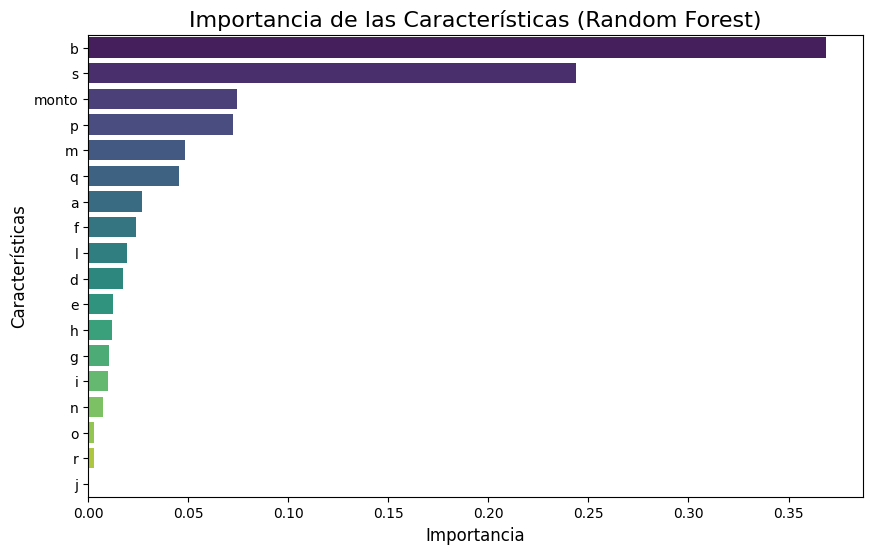

In [42]:
model_randomforest=random_forest()
model_randomforest_fit=random_forest_fit(data_train=data_train_80, data_train_target=target_train_80, model=model_randomforest)
plot_importance_RF(data=data_train_80, model_fit=model_randomforest_fit)

In [43]:
data=[data_train_80,data_test_10]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
Accuracy_r_f_p(model=model_randomforest_fit, data=data, data_target=data_target, name_data=name_data)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.7674022511848341
Accuracy on conjunto_test set: 0.7577014218009479

Realizando predicciones...

Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.7984749455337691
el recall de el conjunto de conjunto_entrenamiento es de 0.19869883437245867
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.31821141740829173
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.7984749455337691
el recall de el conjunto de conjunto_test es de 0.19869883437245867
el valor de f1 de el conjunto de conjunto_test es de 0.31821141740829173
-----------------------------------------------------------------------------------------


Al correr el código por primera vez, nos damos cuenta de que el modelo tiene un *accuracy* bastante bajo tanto en el conjunto de prueba como en el de entrenamiento. Sin embargo, no nos vamos a guiar solo por esta métrica. Si observamos el F1, la precisión y el *recall*, podemos ver que nuestro modelo tiene buena precisión, pero un *recall* muy bajo, lo que da como resultado una métrica F1 bastante deficiente. Ahora vamos a realizar algunos cambios en la base de datos que estamos estudiando para mejorar la capacidad de predicción.

Si analizamos la importancia de las características, podemos notar que las columnas `n`, `o`, `g`, `r` y `j` no aportan mucho al modelo, es decir, podrían estar introduciendo ruido. Además, al observar la tabla de dispersión de Pearson o Spearman, estas columnas presentan valores de correlación bajos. En este caso, las columnas con los valores de correlación más bajos son `n`, `o`, `g`, `f`, `d` y `r`. Por lo tanto, eliminaremos las columnas `n`, `o`, `g`, `r` y `j`, ya que tanto en la gráfica de importancia del modelo como en el análisis de relaciones realizado en el EDA, han mostrado ser poco relevantes o no estar correlacionadas.

In [44]:
data_train_80_modif_rm=data_train_80.drop(['n','o','g','r','j'], axis=1)
data_test_10_modif_rm=data_test_10.drop(['n','o','g','r','j'], axis=1)

Ahora con ayuda de  GridSearchCV vamos a hacer hiper parameter tunning para ver que valores de las feactures nos ayudan a entender mejor el modelo

In [45]:
# optimizacion
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=model_randomforest,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Ejecutar el GridSearchCV
grid_search.fit(data_train_80_modif_rm, target_train_80)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor F1 score obtenido:", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor F1 score obtenido: 0.44421684079431534


Ahora entreneramos el de nuevo el random forest pero con las mejoras anteriormente dichas

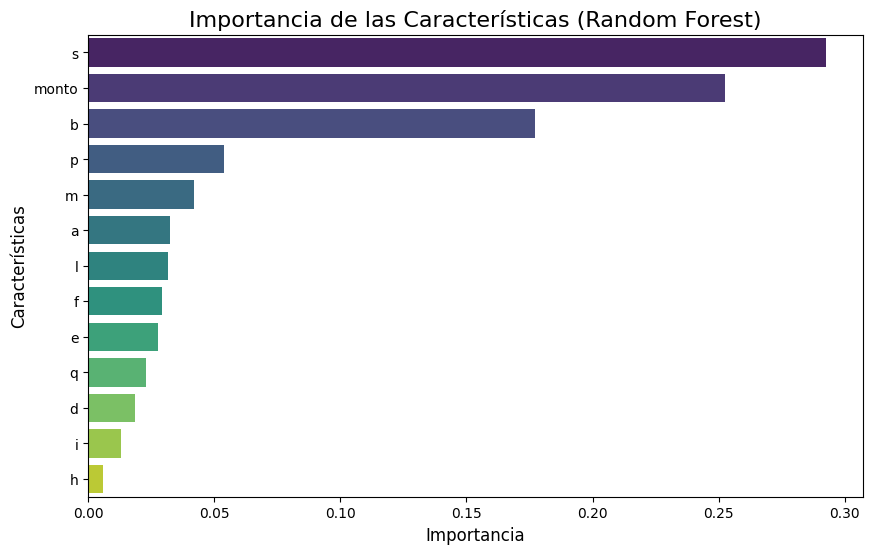

In [46]:
model_randomforest_modif=random_forest(n_estimators=100, max_depth=None, random_state=42, max_features='sqrt',min_samples_leaf=1,min_samples_split=5)
model_randomforest_fit_modif=random_forest_fit(data_train=data_train_80_modif_rm, data_train_target=target_train_80, model=model_randomforest_modif)
plot_importance_RF(data=data_train_80_modif_rm, model_fit=model_randomforest_fit_modif)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.9714899289099526
Accuracy on conjunto_test set: 0.7654028436018957

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  9800    15
1   370  3319


Conjunto conjunto_test
      0    1
0  2258  196
1   596  326



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.995500899820036
el recall de el conjunto de conjunto_entrenamiento es de 0.8997018162103552
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.9451801224547914
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.995500899820036
el recall de el conjunto de conjunto_test es de 0.8997018162103552
el valor de f1 de

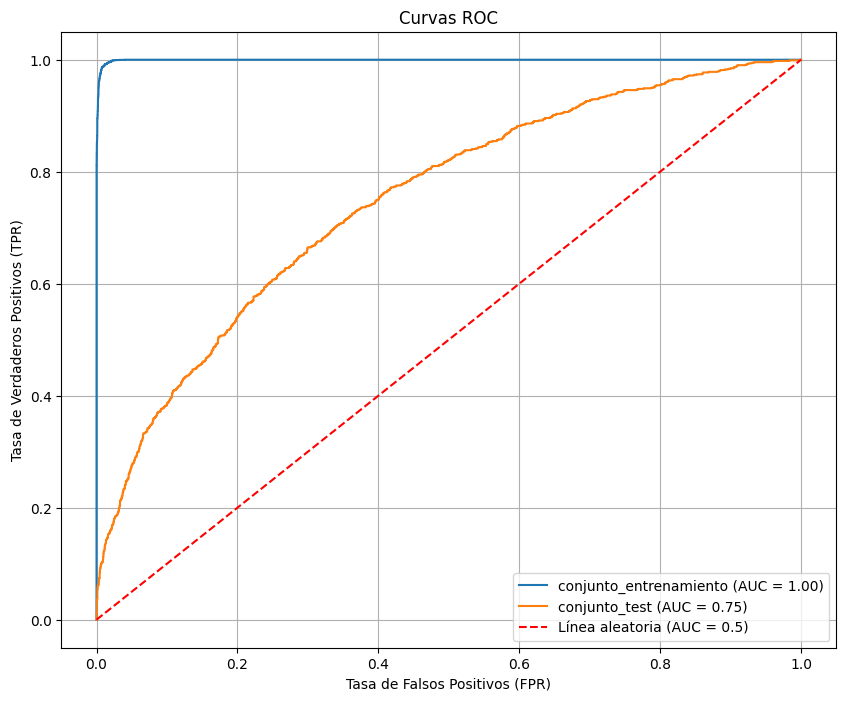

In [47]:
data=[data_train_80_modif_rm,data_test_10_modif_rm]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_randomforest_fit_modif, data=data, data_target=data_target, name_data=name_data)

Ahora podemos ver que tenemos nuevos resultados de las métricas. En estos resultados, observamos que los cambios que le hicimos al modelo no funcionaron, ya que las métricas presentan valores muy altos. En principio, podríamos decir que el modelo fue bueno, pero la verdad es que hay un fuerte sobreajuste. Por ende, se ha decidido descartar este modelo y pasar al siguiente.

# El segundo modelo que usaremos es el de AdaBoost

En este caso vamos a usar el modelo AdaBoost debido a que es un modelo de ensamble que combina varios clasificadores débiles, como árboles de decisión simples, para crear un clasificador fuerte. Funciona asignando pesos a las observaciones y a los modelos: las instancias mal clasificadas obtienen mayor peso en las iteraciones siguientes, obligando al modelo a enfocarse en ellas. Los clasificadores individuales se combinan mediante un voto ponderado para hacer la predicción final. Es efectivo, sencillo y menos propenso a sobreajuste si los hiperparámetros se ajustan adecuadamente.

En este segundo algoritmo vamos a trabajar con el algoritmo adaboost y vamos a realizar el mismo procedimiento que se realizo con el modelo anterior
entonces comenzemos corriendo el modelo con los datos establecidos como predetrminados en el modelo.

In [48]:
from modelos_ml.ml_AdaBoost import adaboost_model, adaboost_fit,plot_importance_AB 

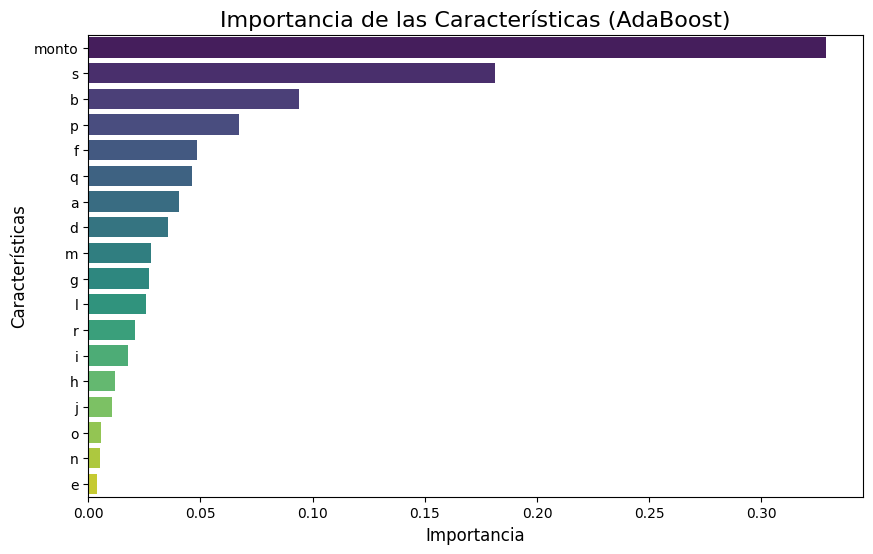

In [49]:
model_AdaBoost=adaboost_model() # tengo datos definidos por default
model_model_AdaBoost_fit=adaboost_fit(data_train=data_train_80, data_train_target=target_train_80, model=model_AdaBoost)
plot_importance_AB(data=data_train_80, model_fit=model_model_AdaBoost_fit)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.7108264218009479
Accuracy on conjunto_test set: 0.6824644549763034

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  6925  2890
1  1015  2674


Conjunto conjunto_test
      0    1
0  1666  788
1   284  638



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.4805895039539899
el recall de el conjunto de conjunto_entrenamiento es de 0.7248576850094877
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.5779747109045715
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.4805895039539899
el recall de el conjunto de conjunto_test es de 0.7248576850094877
el valor de f1 

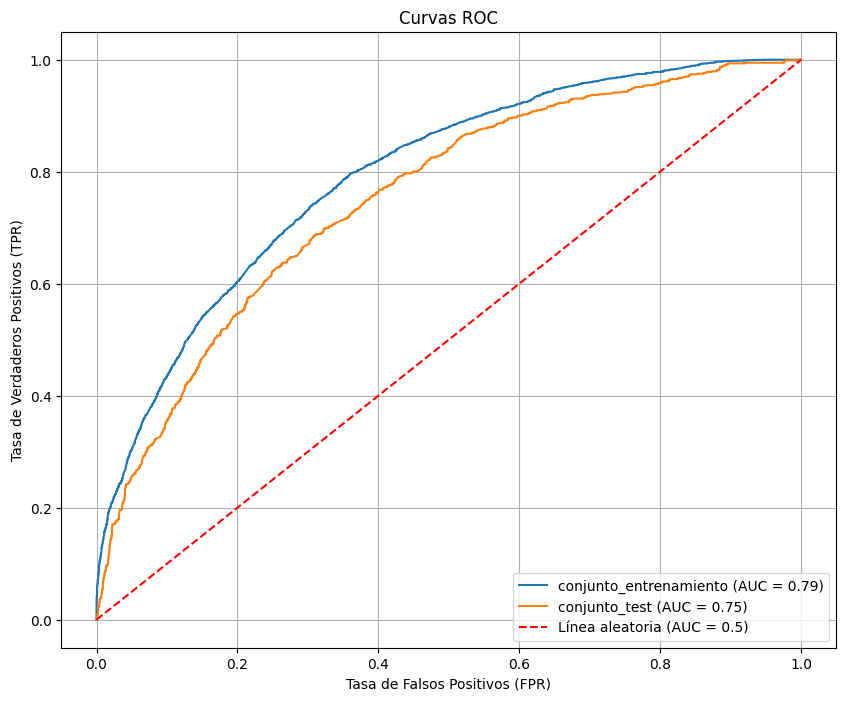

In [50]:
data=[data_train_80,data_test_10]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_model_AdaBoost_fit, data=data, data_target=data_target, name_data=name_data)

Primero, comencemos a analizar las gráficas de importancia de las *features*. En estas podemos ver que todas tienen cierto nivel de importancia, aunque, al observar con detalle, notamos que algunas *features* como `e`, `n`, `o` tienen poca relevancia, por lo que las descartaremos.  

Ahora bien, al revisar las métricas, empezamos observando la precisión (*accuracy*). Sin embargo, no la tomaremos en cuenta porque, como mencionamos anteriormente, estamos trabajando con modelos desbalanceados, y en estos casos, métricas como la precisión no son tan representativas.  

Al analizar la matriz de confusión, podemos observar que el modelo está clasificando muchos datos como falsos positivos y verdaderos positivos, lo cual nos da un buen indicio de su desempeño. Esto se confirma al observar el *recall*, que nos da un valor de 0.72 para ambos *frames*.  

Por otro lado, si evaluamos el *F1-score*, esta métrica tiene un valor de 0.57. Vamos a intentar mejorar esta última métrica, pero por el momento, el modelo AdaBoost nos está dando un buen resultado.

Ahora bien vamos a eliminar las columans las cuales dijimos que en este modelo carecian  de suficiente importancia, y vamos a aplicar hiperparameter tunnig para ver si de esta forma podemos mejorar un poco las metricas.

In [51]:
data_train_80_modif_AB=data_train_80.drop(['e','n','o'], axis=1)
data_test_10_modif_AB=data_test_10.drop(['e','n','o'], axis=1)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el estimador base
estimator = DecisionTreeClassifier()

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200, 300],               # número de estimadores
    'learning_rate': [0.01, 0.1, 1.0],                 # tasa de aprendizaje
    'estimator__max_depth': [1, 2, 3],                 # profundidad máxima del árbol
    'estimator__min_samples_split': [2, 5, 10],        # número mínimo de muestras para dividir
    'estimator__class_weight': ['balanced', None]      # balance de clases en el árbol
}

# Crear el modelo AdaBoost
adaboost = AdaBoostClassifier(estimator=estimator, random_state=42)

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(data_train_80_modif_AB, target_train_80)

# Mejor modelo y parámetros óptimos
best_params = grid_search.best_params_

print("Mejores parámetros encontrados:", best_params)



Mejores parámetros encontrados: {'estimator__class_weight': 'balanced', 'estimator__max_depth': 3, 'estimator__min_samples_split': 10, 'learning_rate': 0.1, 'n_estimators': 100}


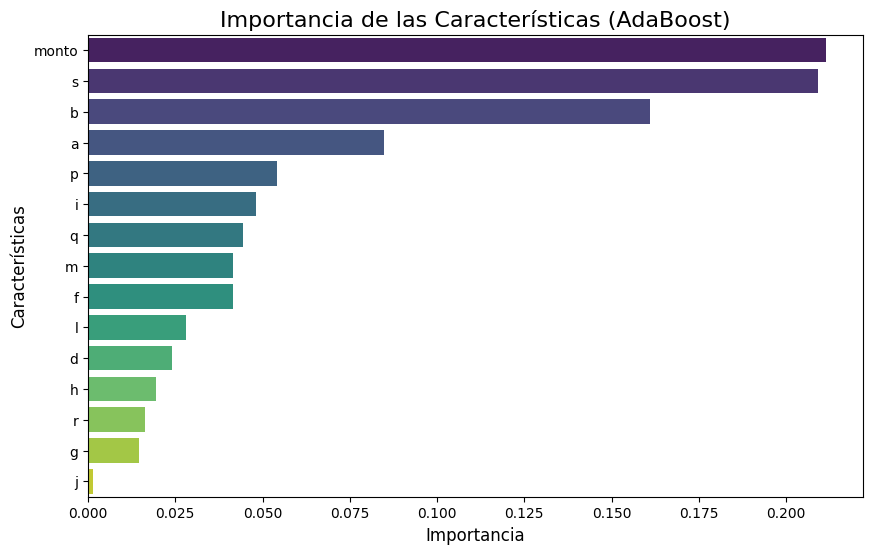

In [53]:
model_AdaBoost_modif=adaboost_model( 
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42,
    max_depth=3,
    class_weight='balanced',
    min_samples_split=10) # tengo datos definidos por default

model_model_AdaBoost_fit_modif=adaboost_fit(data_train=data_train_80_modif_AB, data_train_target=target_train_80, model=model_AdaBoost_modif)
plot_importance_AB(data=data_train_80_modif_AB, model_fit=model_model_AdaBoost_fit_modif)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.707345971563981
Accuracy on conjunto_test set: 0.6839454976303317

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  6835  2980
1   972  2717


Conjunto conjunto_test
      0    1
0  1663  791
1   276  646



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.47691767596980866
el recall de el conjunto de conjunto_entrenamiento es de 0.7365139604228789
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.5789473684210527
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.47691767596980866
el recall de el conjunto de conjunto_test es de 0.7365139604228789
el valor de f1

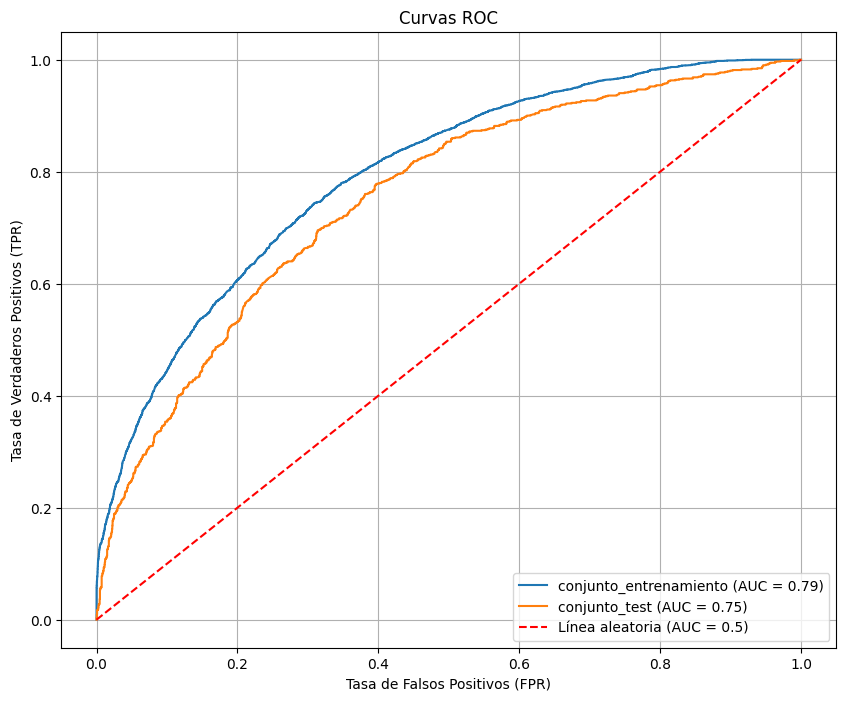

In [54]:
data=[data_train_80_modif_AB,data_test_10_modif_AB]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_model_AdaBoost_fit_modif, data=data, data_target=data_target, name_data=name_data)

Como podemos ver las metricas no mejoraron mucho pero podemos tener la esperanza de que este modelo pueda ayudarmos as adelante y si le aplicamos la tecnica de submuetreo podamos tenr mejores resultado.

# El Tercer modelo que vamos a trabajar es el de xgboost

Ahora el modelo con el que vamos a trabajar es con el Xgboost esto debido a que **XGBoost** (eXtreme Gradient Boosting) es un modelo de aprendizaje de ensamble basado en árboles de decisión, diseñado para ser eficiente, flexible y de alto rendimiento. 

Funciona construyendo árboles de decisión de manera secuencial, donde cada nuevo árbol corrige los errores del conjunto anterior. Optimiza una función de pérdida utilizando gradientes (de ahí el término "gradient boosting") y agrega técnicas avanzadas como:  
- **Regularización**: Reduce el sobreajuste.  
- **Poda de árboles**: Mejora la velocidad y evita árboles innecesariamente grandes.  
- **Manejo de datos faltantes**: Integra estrategias para trabajar con valores ausentes.  
- **Paralelización**: Acelera el entrenamiento.  

Es popular por su capacidad de manejar datos grandes y desbalanceados, ofreciendo métricas sólidas como AUC y F1.

In [55]:
from modelos_ml.ml_XGBoost import  xgboost_model, xgboost_fit, plot_importance_XGB, xgboost_hyperparameter_tuning

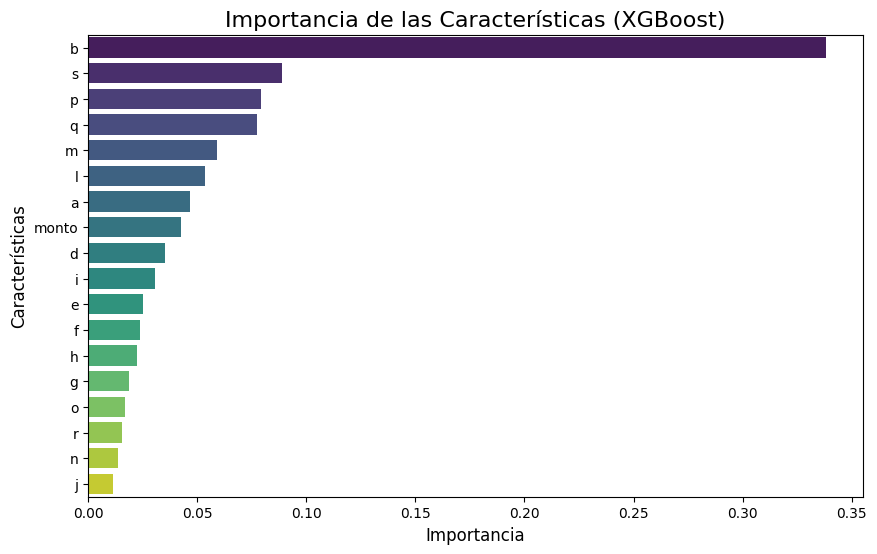

In [56]:
model_XGBoost= xgboost_model() # tengo datos definidos por default
model_XGBoost_fit=xgboost_fit(data_train=data_train_80, data_train_target=target_train_80, model=model_XGBoost)
plot_importance_XGB(data=data_train_80, model_fit=model_XGBoost_fit)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.6981635071090048
Accuracy on conjunto_test set: 0.681872037914692

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  6737  3078
1   998  2691


Conjunto conjunto_test
      0    1
0  1640  814
1   260  662



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.4664586583463339
el recall de el conjunto de conjunto_entrenamiento es de 0.7294659799403632
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.5690420807781772
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.4664586583463339
el recall de el conjunto de conjunto_test es de 0.7294659799403632
el valor de f1 d

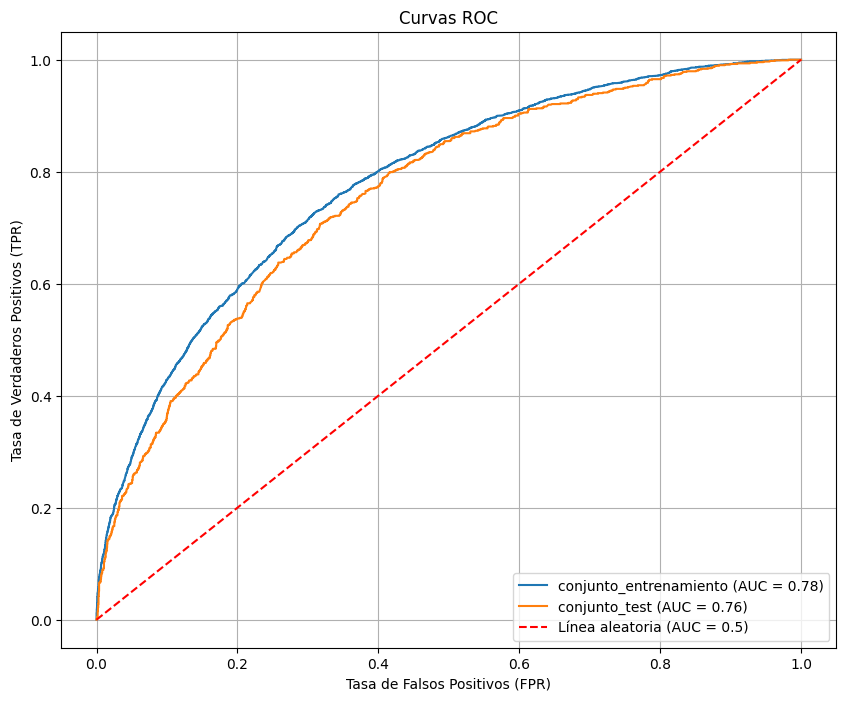

In [57]:
data=[data_train_80,data_test_10]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_XGBoost_fit, data=data, data_target=data_target, name_data=name_data)

Ahora bien si ejecutamos este modelo con hiperparametros ya definidos por default y para todas las feactures podemos que el modelo se esta ajustantando bien a nuestro caso que es tener un recall alto y tener mas falsos positivos que falsos negativos, entonces vamos a eliminar las columnas ``j`` y ``n`` que en este caso, el modelo nos dice que son las feactures que tienen menor importancia y vamos a hacer hiperparameter tunnig

In [58]:
data_train_80_modif_XGB=data_train_80.drop(['j','n'], axis=1)
data_test_10_modif_XGB=data_test_10.drop(['j','n'], axis=1)

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Supongamos que tienes las variables `X_train` y `y_train` listas
best_model = xgboost_hyperparameter_tuning(data_train_80_modif_XGB,target_train_80, param_grid)

# Evaluar el modelo ajustado
#y_pred = best_model.predict(X_test)
#print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores Hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Mejor Puntuación (ROC AUC): 0.7633969319625195


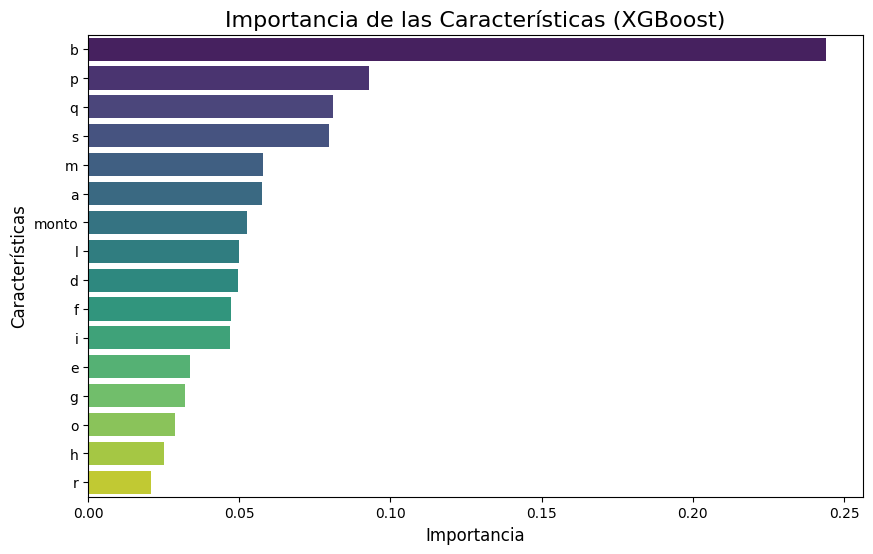

In [60]:
model_XGBoost_modif= xgboost_model(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42,colsample_bytree=1.0,subsample= 1) # tengo datos definidos por default
model_XGBoost_fit_modif=xgboost_fit(data_train=data_train_80_modif_XGB, data_train_target=target_train_80, model=model_XGBoost_modif)
plot_importance_XGB(data=data_train_80_modif_XGB, model_fit=model_XGBoost_fit_modif)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.7444460900473934
Accuracy on conjunto_test set: 0.6963862559241706

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  7215  2600
1   851  2838


Conjunto conjunto_test
      0    1
0  1716  738
1   287  635



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.5218830452372195
el recall de el conjunto de conjunto_entrenamiento es de 0.7693141772838168
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.6218910923633176
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.5218830452372195
el recall de el conjunto de conjunto_test es de 0.7693141772838168
el valor de f1 

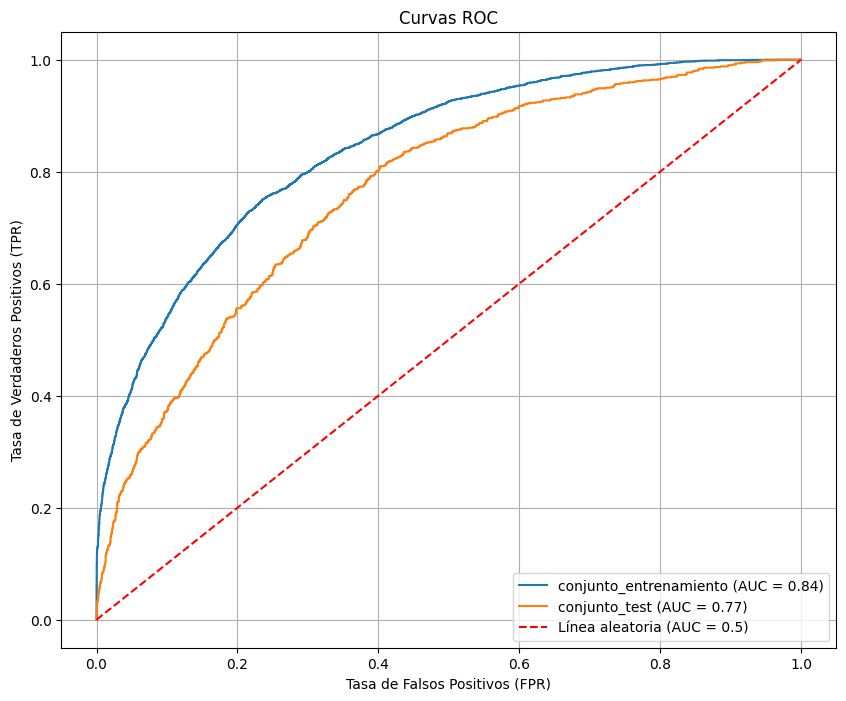

In [61]:
data=[data_train_80_modif_XGB,data_test_10_modif_XGB]
data_target=[target_train_80,target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_XGBoost_fit_modif, data=data, data_target=data_target, name_data=name_data)

## Uso de submuestreo como tecnica para poder mejorar un poco las metricas

Ahora como podemos ver nuestros la mayoria de nuestros modelos implementados estan prediccioendo mas o menos bien, en el sentido de que pueden detectar cuando es fraude una transaccion y uando no teniendo en cuenta un recall alto lo que favorece los falsos positovos, pero ahora bien, nostros queremos mejorar este modelo para que podamos tener mas certeza y confiabilidad a la hora de usarlos, y sabemos que el modelo puede mejorar siempre y cuando solucionemos el desbalanceo, entonces vamos a tratar de solucior el tema del desbalanceo para esto existen dos tecnicas las cuales son:

* Oversampling: El sobremuestreo consiste en aumentar el número de ejemplos de la clase minoritaria para que sea más representativa en el conjunto de datos. Esto equilibra las clases sin reducir información de la clase mayoritaria.

* Undersampling: El submuestreo consiste en reducir el número de ejemplos de la clase mayoritaria para que coincida más estrechamente con la clase minoritaria. Esto equilibra las clases eliminando datos.

En este caso nosotros vamos a elegir el metodo de Undersampling para tratar de resolver esta problematica, y esta la usaremos para el modelo de xgboost

In [62]:
from sklearn.cluster import KMeans

# Supongamos que X_majority y X_minority son los conjuntos separados por clase
X_majority = datos_limpios_train_80[datos_limpios_train_80['fraude'] == 0].drop(columns=['fraude']).values # Datos de la clase mayoritaria
X_minority =  datos_limpios_train_80[datos_limpios_train_80['fraude'] == 1].drop(columns=['fraude']).values  # Datos de la clase minoritaria
# Número de muestras a seleccionar (igual a la clase minoritaria)
n_samples = len(X_minority)

# Aplicar K-Means para agrupar la clase mayoritaria
kmeans = KMeans(n_clusters=n_samples, random_state=42)
kmeans.fit(X_majority)

# Seleccionar el ejemplo más cercano a cada centroide
centroids = kmeans.cluster_centers_
indices = []
for center in centroids:
    closest_index = np.argmin(np.linalg.norm(X_majority - center, axis=1))
    indices.append(closest_index)

# Crear el conjunto submuestreado
X_majority_undersampled = X_majority[indices]

# Combinar con la clase minoritaria
X_balanced = np.vstack((X_majority_undersampled, X_minority))
y_balanced = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

print("Datos balanceados:", len(X_balanced))

Datos balanceados: 7378


Antes de seguir con el modelo aclaremos algo, y es que cuando hablamos de sumbuestreo tenemos que valancear las dos clases eliminando muestras de la clase mayoritaria, esto es bueno porque nos ayuda a balancear los datos, pero tenemos la posibilidad que cuando eliminamos las muestras podemos perder datos importantes, o podemos perder patrones entonces debemos de tener mucho cuidado a la hora de elegir con que muestras quedarnos y que muestras eliminar de la clase mayoritaria; pero para este problema existen muchos metodos de solucion en este caso veremos algunos y elegiremso el que mas sea acorde a nuestra situacion

1. **Submuestreo aleatorio (Random Under-Sampling):**
   - Selecciona una cantidad aleatoria de ejemplos de la clase mayoritaria para igualar la cantidad de la clase minoritaria.

2. **Submuestreo dirigido (Directed Under-Sampling):**
   - Elimina ejemplos redundantes o menos informativos de la clase mayoritaria, como ejemplos muy similares entre sí.

3. **Cluster-based Under-Sampling:**
   - Agrupa ejemplos de la clase mayoritaria en clústeres (por ejemplo, con K-Means) y selecciona un representante de cada clúster.

4. **Técnicas basadas en métricas (EasyEnsemble, BalanceCascade):**
   - Dividen los datos mayoritarios en varios subconjuntos y entrenan modelos independientes en cada uno.

en este caso se va a trabar con el tercer metodo para elegir el problema de desbalance, entonces vamos a por ello.
  



In [63]:
X_train_balanced=pd.DataFrame(X_balanced)
X_train_balanced.columns=data_train_80.columns
y_target_balanced = pd.Series(y_balanced, name=target_train_80.name)

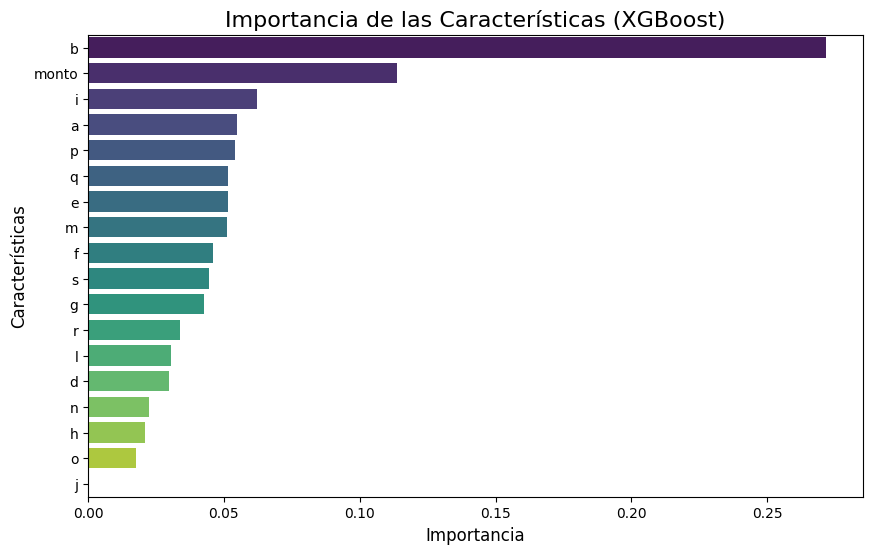

In [64]:
#modelo balanceado
model_XGBoost_mb= xgboost_model() # tengo datos definidos por default
model_XGBoost_fit_mb=xgboost_fit(data_train=X_train_balanced, data_train_target=y_target_balanced, model=model_XGBoost_mb)
plot_importance_XGB(data=X_train_balanced, model_fit=model_XGBoost_fit_mb)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.7113038763892654
Accuracy on conjunto_test set: 0.619372037914692

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  2524  1165
1   965  2724


Conjunto conjunto_test
      0     1
0  1441  1013
1   272   650



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.7004371303677038
el recall de el conjunto de conjunto_entrenamiento es de 0.7384114936297099
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.718923198733175
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.7004371303677038
el recall de el conjunto de conjunto_test es de 0.7384114936297099
el valor de f1

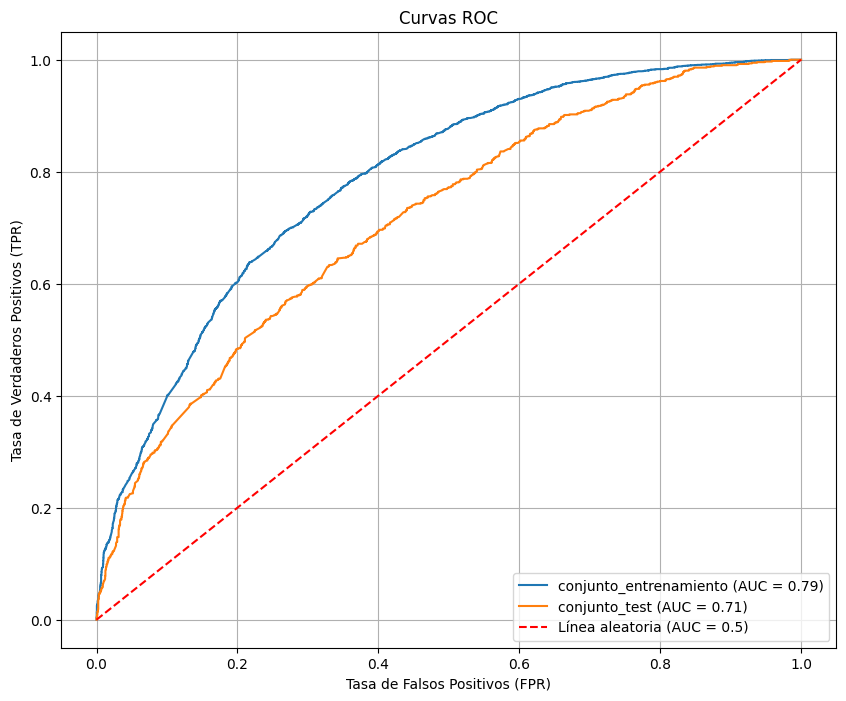

In [65]:
data=[X_train_balanced, data_test_10]
data_target=[y_target_balanced, target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_XGBoost_fit_mb, data=data, data_target=data_target, name_data=name_data)

Ahora bien una vez echo el trabajo de balancear el conjunto de entrenamiento y de haber corrido la evaluacion de las metricas vemos que tanto la presicion, como el recall y el f1 score han aumentado y es lo qeu buscabamos pero vamos a eliminar la feacture la cual no tiene importancia para el modelo y luego hagamos un hiperparameter tunning.


In [66]:
X_train_balanced_Xgb_modif=X_train_balanced.drop(['j'], axis=1)
data_test_10_xgb_modif=data_test_10.drop(['j'], axis=1)

In [67]:
#ahora hacer hiperparameter tunning

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Supongamos que tienes las variables `X_train` y `y_train` listas
best_model = xgboost_hyperparameter_tuning(X_train_balanced_Xgb_modif,y_target_balanced, param_grid)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores Hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Mejor Puntuación (ROC AUC): 0.7444738147055681


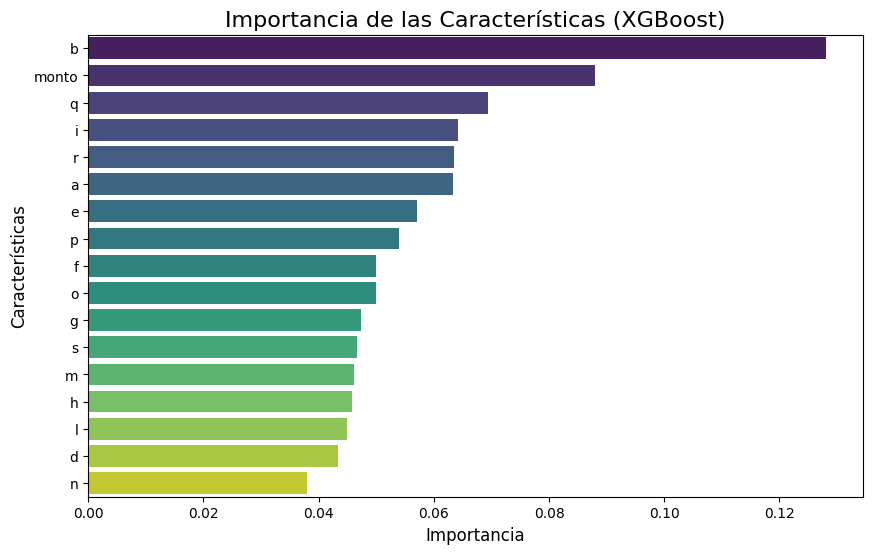

In [68]:
model_XGBoost_bal_modif= xgboost_model(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 7, n_estimators= 50, subsample= 0.8) # tengo datos definidos por default
model_XGBoost_fit_bal_modif=xgboost_fit(data_train=X_train_balanced_Xgb_modif, data_train_target=y_target_balanced, model=model_XGBoost_bal_modif)
plot_importance_XGB(data=X_train_balanced_Xgb_modif, model_fit=model_XGBoost_fit_bal_modif)

Cálculo de Accuracy:
Accuracy on conjunto_entrenamiento set: 0.773109243697479
Accuracy on conjunto_test set: 0.6255924170616114

Realizando predicciones...

Matriz de confusión:
Conjunto conjunto_entrenamiento
      0     1
0  2710   979
1   695  2994


Conjunto conjunto_test
      0     1
0  1443  1011
1   253   669



Cálculo de métricas:
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_entrenamiento es de 0.7535867102944878
el recall de el conjunto de conjunto_entrenamiento es de 0.8116020601789102
el valor de f1 de el conjunto de conjunto_entrenamiento es de 0.7815191855912295
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
la presicion de el conjunto de conjunto_test es de 0.7535867102944878
el recall de el conjunto de conjunto_test es de 0.8116020601789102
el valor de f

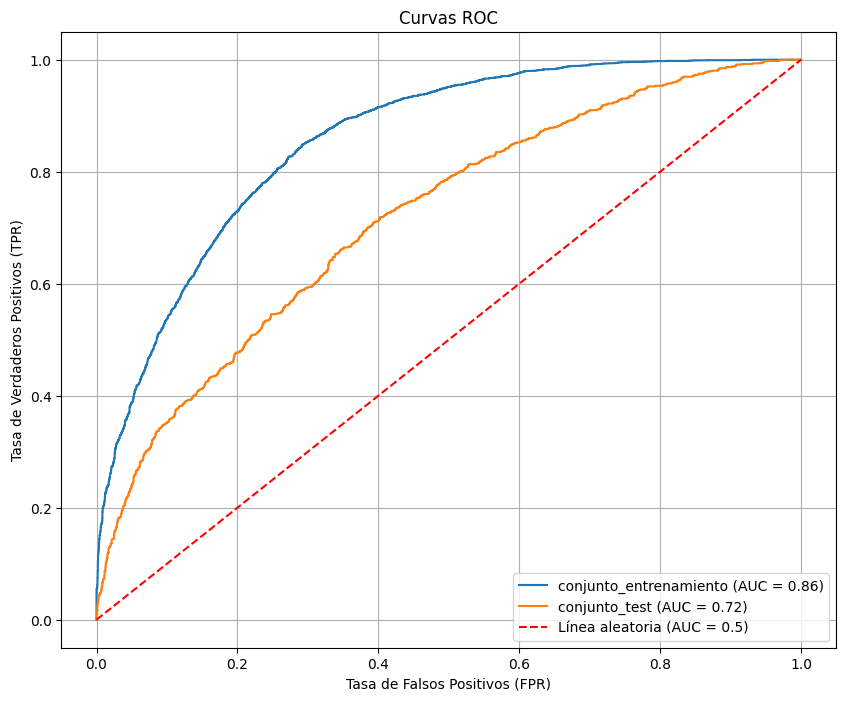

In [69]:
data=[X_train_balanced_Xgb_modif, data_test_10_xgb_modif]
data_target=[y_target_balanced, target_test_10]
name_data=["conjunto_entrenamiento","conjunto_test"]
ejecutar_evaluacion_completa(model=model_XGBoost_fit_bal_modif, data=data, data_target=data_target, name_data=name_data)

como conclusion el modelo que usarmos para subir a produccion es el de xgboost esto debido a que en problemas de detección de fraude, donde los datos suelen estar altamente desbalanceados, **XGBoost** tiende a superar a **AdaBoost** debido a su capacidad para manejar este desbalance de manera más efectiva. XGBoost ofrece parámetros como `scale_pos_weight`, que permite ajustar la importancia de la clase minoritaria (fraude), y utiliza optimizaciones avanzadas basadas en el gradiente segundo (Hessian), lo que le permite capturar patrones complejos con mayor precisión. Además, su enfoque regularizado y capacidad para podar ramas irrelevantes lo hacen más resistente al ruido y los valores atípicos, que son comunes en este tipo de problemas.

Por otro lado, AdaBoost, aunque efectivo en problemas más balanceados, puede ser menos adecuado para detectar fraudes debido a su sensibilidad al ruido y su falta de mecanismos nativos para manejar el desbalance entre clases. XGBoost también es más escalable y eficiente en grandes volúmenes de datos, gracias a su soporte para paralelización y GPU. Estas ventajas hacen que XGBoost sea una mejor opción para problemas de fraude, donde la precisión en la identificación de casos minoritarios es crítica para el éxito del modelo.

no obstante podemos decir que el submuestreo es una buena tecnica para el balanceo debido a que  es una técnica efectiva para abordar el desbalanceo de datos porque reduce la dominancia de la clase mayoritaria al seleccionar una muestra representativa más pequeña de esta, equilibrándola con la clase minoritaria. Esto permite que los algoritmos de aprendizaje presten igual atención a ambas clases durante el entrenamiento, mejorando su capacidad para identificar correctamente casos de la clase minoritaria (como el fraude). Además, al simplificar el conjunto de datos, el submuestreo también puede reducir el tiempo de entrenamiento, lo cual es especialmente útil en modelos complejos. Aunque puede llevar a una pérdida de información de la clase mayoritaria, si se realiza de manera estratégica, conserva las características clave y mejora la capacidad del modelo para generalizar en escenarios desbalanceados.

# guradar el modelo

In [70]:
import joblib

In [71]:
joblib.dump(model_XGBoost_fit_bal_modif, 'XGB_model.pkl')

['XGB_model.pkl']

In [5]:
datos.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'Monto', 'Fraude'],
      dtype='object')